In [1]:
import os
import timeit

#corpus_path="/data1/call_miner/Vinyas_Call_miner/call_miner/Feb_Text_data"
corpus_path="/data1/call_miner/Vinyas_Call_miner/call_miner/May_CM_Untagged"
%time filenames = sorted([os.path.join(corpus_path, fn) for fn in os.listdir(corpus_path)])

CPU times: user 1.84 s, sys: 93 ms, total: 1.93 s
Wall time: 2.06 s


In [2]:
len(filenames)

359583

In [1]:
python -m visdom.server

SyntaxError: invalid syntax (<ipython-input-1-51eaa581e1a4>, line 1)

In [3]:
filenames[:5]

['/data1/call_miner/Vinyas_Call_miner/call_miner/Feb_Cust_words/file_10000000.txt',
 '/data1/call_miner/Vinyas_Call_miner/call_miner/Feb_Cust_words/file_10000001.txt',
 '/data1/call_miner/Vinyas_Call_miner/call_miner/Feb_Cust_words/file_10000002.txt',
 '/data1/call_miner/Vinyas_Call_miner/call_miner/Feb_Cust_words/file_10000003.txt',
 '/data1/call_miner/Vinyas_Call_miner/call_miner/Feb_Cust_words/file_10000004.txt']

In [6]:
test=filenames[:200]

In [6]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# nltk for lemmatization
from nltk.stem.wordnet import WordNetLemmatizer

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim 
import logging
#logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', filename='/data1/call_miner/Vinyas_Call_miner/call_miner/Lavanya/Log_File.log',level=logging.DEBUG)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [31]:
    from sklearn.feature_extraction import stop_words
    #print(stop_words.ENGLISH_STOP_WORDS)
    my_stopwords=['representatives', 'assisting', 'callers', 'hold', 'continue','afternoon','bye','alright','good day','yeah','maam','redacted'
                 ,'uh','dollars','social','thank you so much','welcome','thank you','great day','nice day','appreciate','sorry','appologize','calling','assist',
    'unfortunately','umm','wonderful','ok','right','appreciate','else','business','gotta','great','day','can','may','recorded','monitored','please','thanks'
    ,'dot','com','dollar','okay','ahead','interrupt','reconnected','caller','gonna','actually','welcome','representative','too','moment','inconvenience','anything','patience'
     ,'whatsoever','thank','pretty','dollars','hmm','youre','yup','just','pleasure','bet','else','sir','called','mister','correct','thirtieth','girlfriend',
    'wife','husband','mister','robert','bridge','wyoming','cities','maam','because','southwest','very','important','answered','shortly','logo','abbreviated'
    ,'eighteen','twenty','sec','thirty','cents','seven','five','hundred','sink','read','back','live','roberts','ill','this','services','service','detailed','information'
    ,'thats','alrighty','thirtieth','sinker','slash','someone','its','oh','john','maya','um','im','uhhh','uh','patiently','theyre','mm','oh','nope','ah','morning','yes',
    'patient','awhile','id','january','sure','mr','hes','youd','man','hi','lunch','glad','press','currently',
    'itll','ninety','fourty','fifty','definitely','november','seventh','seventeen','participating','enjoy','mi',
    'dog','pound','exactly','mhm','let','eh','apologize','fourteenth','theyll','holding','said','sat','additional','valued','customer','today','thousand','january','february','friday','goodbye',
    'paula','mary','jonas','good','thirteenth','all','sunday','apologies','sickening','kevin','rosemary','jet','theres','ms','nineteen','you',
    'busy','helping','forward','hotel','washington','anderson','american_eagle','campbell','vicinity','mean','cause','seventy','zero','jacks','michelle',
    'maryland','marilyn','bobby','hall','transfer','department','fully','verified','josh','cox','bury','nissan','magic','sabrina','collect','debt','obtained',
    'recorded','monitored','jennifer','rebecca','roger','momentarily','rogers','colorado','reynolds','jordan','samantha','chevron','texaco','douglas',
    'wallace','suffix','janine','mia','angelo','perez','charleston','wrestling','charlene','bernard','husbands','eighty','december','fourteen','sixteen',
    'judy','jasmine','marcus','barry','bailey','collins','ashley','beverly','ronald','peterson','brandson','ellis','sal','springs','hawaii',
    'williams','jackson','umbrella','grandkids','lancaster','rocha','jeff','jeffrey','jonathan','alexander','candice','bert','israel','carlo','trash','berger',
    'lauren','mun_os','electrical','bourbon','ralph','torres','alexis','evans','heater','coughing','misty','alan','franklin','allen','gina','regina',
    'hernandez','jeremy','corrine','nichols','seymour','snell','nickel','nail','hayes','mesquite','shelby','dance','keith','martins','jenn','coax','dizzy',
    'brad','mortgage','penney','joanne','foster','brian','wills','easter','cody','britney','wins','richardson','patrick','christopher','heather','gordan',
    'garcia','porter','myers','todd','matthew','bruce','lawrence','sar','dori','ba','worn','hunter','jury','slope','melanie','martha','melody','hampton',
    'shes','hes','he','she','violet','mcdonalds','sonny_hide','sonja','room','bedroom','ya','wide','giants','dori','da','honey','bury','nissan','sabrina','shots','magic',
    'tin','brooks','suck','brush','hello','hear','brown','trinity','marshall','cinemax','marshalls','graft','going','way','look','looks','learn',
    'miss','chris','kelly','daughters','henry','maryann','martin','american_eagle','jones','crystal','highland','vegas','sugar','terra','upbeat','marrow',
    'pine','jersey','wifes','kathleen','black','cynthia','howard','cooper','soccer','cassidy','pink','guards','marsha','kirk','drake','berg','chilly',
    'cocoa','smith','monica','antonio','mrs_smith','mickey','schmidt','karan','winston','caro','rhonda','testament','fussing','tobacco','maurice',
    'danielle','pipe','robin','robinson','mitchell','mistress','eugene','ts','pittsburgh','amanda','shelly','donna','maggie','ron','verizon',
    'miami','jesse','sanders','davis','heidi','trisha','tina','cooke','butler','watson','warmer','seventeenth','september','july','survey','wilson',
    'coleman','alexandra','wishing','patricia','taylor','connie','michael','scott','toys','nicole','massachusetts','vicki','johnson','barbara',
    'wash','christina','natalie','grove','rico','carmen','rodriguez','philadelphia','krause','eileen','jay','sam','gallant','demi','phili','curb','fifteenth',
    'march','sixteenth','alabama','deborah','jessica','mattress','harris','mississippi','minnesota','darlene','thomas','hampshire','jake','walter','travis',
    'mar','richard','rebate','catherine','theresa','katherine','teresa','kathryn','bryant','alaska','richards','sharon','elizabeth','pennsylvania',
    'tennessee','north','teeny','lyons','sergio','pile','joyce','joseph','ruth','castro','barnes','memphis','kalli','christy','pro','la',
    'colors','missus','hodge','kerri','cassandra','volvo','cochran','shakes','paddle','philippines','thompson','walmart','colleges','elizabeth','alex',
    'nineteenth','love','christie','kristen','bradley','raleigh','cheryl','charle','illinoi','connecticut','thursday','monday','tuesday',
    'wednesday','friday','saturaday','sunday','church','florida','tomorrow','cindy','cleveland','lewi','ive','kathy',
    'shirley','gail','heat','pound','harder','pod','jame','david','florence','uhuh','san','hell','craig','renter','razor',
    'carpet','buffalo','clinton','lam','george','jack','green','kilo','dear','bell','carolina','lay','indian','arizona','charlie','buck','corey','christma',
    'eagle','american','donald','ryan','bible','creek','grenade','shore','diane','sherry','shane','fifth','karen','eleventh','brenda','jim','delta',
    'uncle','slim','totale','crate','melton','columbu','broker','renee','thankful','park','climb','holy','dryer','washer','baton','chuckle','chip','bay','ohio',
    'pend','gloria','hamburg','marco','sea','gallon','shoulder','stroller','merry','brochure','bat','clone','latch','angela','dad','land','arkansa',
    'andy','twelfth','movie','adam','song','daisy','wha','lisa','farm','denni','king','crack','york','nancy','boulevard','baby','sister',
    'saint','sweetheart','canada','south','dodge','thirteen','exit','nineteenth','bachelor','victoria','arbor','actres','spark','perjure','monster',
    'knee','corbin','curry','gurney','lynch','el','mercy','windy','arlington','ought','colors','missus','hodge','kerri','cassandra','volvo','cochran','shakes','paddle','philippines','thompson','walmart','colleges','elizabeth','alex','like','johnnie','twentieth','eighth','fourth','timothy','melinda','skate','kiss','levin','gate','jan','cook','chest','sp','chest','devon','tim','dalla','boston','greg','amy','pari','dry','apart','grocery','non','carolyn','tony','cast','lin','counsele','natural','desk','boyfriend','norton','marion','oakland','care','itemize','plu','yep','concord','dale','shoe','know','cream','ha','energy','maple','darle','ed','joan','scrape','transplant','wheel','dokey','central','sara','shall','student','allison','national','highway','shawn','lorie','wed','else','enjoy','fence','kendall','motorola','terell','sandra','western',
    'oak','chuck','wendy','april','june','august','september','meir','nah','sixth','fan','xena','tallahassee','meir','kentucky','maybe','desk',
    'cool','girl','calendar','charlotte','tracy','jamie','thatd','thatll','chicago','draft','rio','mart','kendall','gravel','cope','stein','earl','sacramento','porn','joey','brianna','allstate','virginia','margaret','baltimore','weigh','fine','linda','ration','sear','magazine','irene','trenton','southern','stove','benjamin',
    'limb','tate','eighteenth','mexico','wage','missouri','travele','meal','tran','animal','lemme','span','heres','here','bake','simpson','lander','jerry','amber','deer','scrub','alarm','murphy','seattle','del','boom','pillow','ramp','reckon','lose','perk','bound','boulder','straw','uncle','thailand','dirty','okie','blood','pipe','gallagher','cozy','cater','alaskan','jesus','christ','willow','royal','preacher','lake','california','texa','ahold','scam','awesome','jump','gary','miller','kiss','crown','gritty','greg','kay','nurse','vehicle','master','sam','carla','plu','garbage','saturday','edward','glitch','alice','screw','heck','utah','ed','opt','devil','wal','shore','laura','angie','okey','cute','jame','pet','jane','jenny','dog','unit','kim','christine','lori','betty','chicken','tight','curiou','rachel','clark','sally','sarah','shed','nicky','hon','spike','dump','deli','spee','coma','denni','gee','dumb','candy','drama','bully','october','apple','daniel','mile',
    'junior','amy','lee','kitchen','wed','aisle','ray','joy','boss','peter','franci','jackie','hot','dish','let','ice','nah','yep','jason','lewi','parker','steven','tampa','kimberly','phillip','niece','mara','cooler','si','student','claire','hum','holly','justin','serial','di','swear','oakley','semi','marcie','preach','hane','roller','creature','fracture','funcky','astro','really','maybe','durham','gram','school','afford','lot','chuck','love','slam','sauce','holler','holloway','crunch',
    'purity','los','william','oklahoma','marie','kurt','sticker','sandra','dale','steve','sara','phoenix','roof','german','marry','spel','part','wear','perry',
    'underscore','golf','midnight','hurt','east','mall','sheila','buddy','aunt','wash','leisha','their','morrison','jessie','kentucky','lin','sandy','madison','albert','adult','youll','goodnes','bike','carolyn','julie','janice','berry','river','ta','anti','marriage','leo','bran','nervou','stone','loui','wh','peabody','boil','alley','goldberg','alison','cramer','mika','want','clothe','tom','debbie','paul','diana','indiana','christian','joke','andrea','mount','grandma','void','grandmother','cure','nearest','elaine','jog','bail','marsh','bal','landscape','palo','picky','scare','warn','emily','fort','lacey','andrew','train','debra','denise','bark','owe','michigan','go','guess','tammy','lo','echo','northwest','chest','phil','democrat','cloud','arch','cosigner','caribbean','headache','marker','sickle','arch','lowe','stephanie','arkansa','eat','teacher','christma','georgia','derek','marion','do','square','anthony','caroline','stacy','ad','nicely','medic','thing','metal','america','susan','pamela','dan','carl','cap','charle','neighbor','tape','gordon','barely','mailman','jot',
     'belly','cue','larger','trish','klein','tanya','phillip','dixon','lucia','ne','merit','bronx','jewelry','cha','brittany','bonnie','bio','nick','korea','chevy',
    'female','grandmother','ruby','thisll','etcetera','tuesday','lobby','septic','cincinnati','vietnam','fern','go','gotcha','evelyn','louisiana', 
     'belly','cue','larger','trish','klein','tanya','phillip','dixon','lucia','ne','merit','bronx','jewelry','cha','brittany','bonnie','bio','nick','korea','chevy',
    'female','grandmother','ruby','thisll','etcetera','tuesday','lobby','septic','cincinnati','vietnam','fern','go','gotcha','evelyn','louisiana','ho','lily',
    'leah','go','roll','shoot','bless','weigh','band','effect','erase','wood','drive','gun','beaumont','carpenter','corol','jewel','nowaday','microwave','year',
    'altogether','take','men','mass','spouse','cherry','dock','jump','larry','eric','minute','rise','roll','shoot','til','ring','beaumont','timer','obviou',
    'god','tell','say','sai','neil','oop','limbo','piper','cetera','perky','tenni','think','rack','perfect','senior','aol','ember','reese','crow','phillip','maternity','focuse','doable','juno','plymouth','stead','airborne','melissa','angel','clay','freezer','tablet','corny','as','pale','xray','whack','nashville',
    'hy','shaw','stink','filipino','marty','cathy','francisco','wisconsin','mid','teen','van','road','birthday','chase','forest','stacey','maria','gosh',
    'bump','ros','se','europe','lewi','mari','sue','sister','ninth','brace','atlanta','year','tear','bore','delhi','duck','monroe','mun','cooky','yahoo',
    'fat','bronx','cha','weve','sock','mac','chaise','calhoun','simon','lousie','klein','box','glen','nichola',
     'sonny','melissa','stuff','blah','di','destin','meal','der','loui','dalla','elite','pari','adam','brooklyn','flore','bird','village','rick',
    'randy','stewart','ting','stern','steven','latin','mar','hey','as','harold','marjorie','dinner','jaclyn','joel','re','mike','nextel','sacre','iraq',
    'pour','iraq','prayer','peter','lit','cow','chocolate','jeff','mit','mama','wed','moore','saturday','troy','tiffany','birch','grass','sherman','fan',
    'plu','horn','noon','treadmill','sterile','clothe','alicia','let','la','al','grainy','molly','wet','arkansa','ton','karl','nec','guam','waco','philly',
    'randall','puppy','quinn','li','pete','nichola','ken','babysit','sha','em','cornell','sweater','arm','reno','bowman','mi','mormon','curti','nut',
    'sherri','pan','boyd','beth','burges','bake','sery','becky','carey','nelson','boat','bra','shame','eye','hail','oop','zurich','josie','whistle','phoebe','squash','beatle','worm','truck','bola','schooler','megan','genetic','scenario','mate','salisbury','cargo','drawer','intra','bolt','malibu','dominick','window','sery','peggy','desert','emma','rendell','buse','laurel','washer','jumper','carlo','pizza','santa','whitfield','predictive','own','spring','bulk','radio','ski','hurst','snyder','racially','tommy','tino','cloudy','ar','suffice','coincidence','jo','singer','trustee','prior','silo','jeep','jet','suburban','vale','drive','nut','damn','ford','disregard','gap','baggage','resort','dalla','texa','crane','peach','guilty','meyer','clifton','refine','later','even','shear','board','pass','lipstick','prick','jacket','water','lane','mockingbird','quite','straight',
'bout','underneath','saturday','weigh','descktop','rumor','wheeze','fireplace','oldest','child','lovell','born','manpower','coolant','jacksonville','secret',
'proper','sister','slam','eastern','memo','underground','cushion','terrify','we','food','gentlemen','youve','impair','bourne','clueles','week','billy','what',
'absolutely','moment','guilt','calorie','oliver','simi','codec','divorce','year','hornet','tie','brady','void','juice','literature','frost','rochester','tickle','errand','chang','compact','upcome','trail','handy','hayley','houston','leave','layoff','crepe','bandy','margret','freezer','accord','cart','comment','cal','oral','slide','scrap','borough','grip','earth','cole','undergo','flaw','justice','glove','peace','mulder','picture','inset','bakery','burst','crest','wher','yearly','moral','cook','inspect','perch','orchard','op','cursor','cone','gallery','jenkin','virgin','adriana','merle','recipe','blackwell','ingram','adverse','somebody','clearly','vanity','sleep','notable','hash','human','resource','kalamazoo','zo','poem','certainly','answer','course','reach','normally','thing','obviously','jame','pain','stay','background','tara','harvey','culture','launch','junction','registrar','centric','kilborn','sweeney','carol','kill','chance','rent','duplicate','katie','leafy','accord','soak','tram','tren','rite','stalk','ask','mo','small','sense','shoot','shock','dawn','nature','bowl','root','nerve','tick','bender','wheel','snowy','magically','play','catch','bride','clientele','saxon','pirate','crash','sunset','flick','lung','rub','escrow','guest','itinerary','index','partner','duh','ti','spoil','furnish','afford','lame','summit','gutter','sort','throw','barbecue','pearce','pregnant','pat','la','sake','d','sandal','dash','meter','rear','bow','chevrolet','whiskey','aspect','epic','bordeaux','hollywood','soften','marta','shun','morrow','marta','cadillac','zar','fracture','widow','kikwit','ownen','manila','wall','crew','room','accrue','denver','norma','mom','beatty','midland','gorman','dena','mop','poppy','essense','seacrest','plane','plenty','chad','stroll','mock','clara','sommer','cheery','dryer','lafayette','hijack','blank','injury','tend','milan','elephant','mentor','barrio','outskirt','norton','zoo','censor','kilink','francine','incarcerate','religiou','versa','flop','allentown','korda','notch','parade''greenbay','rainer','tomlinson','diaz','infront','skin','mason','dyer','restate','atlantic','blair','tile','spear','tomato','nap','cobalt','moon','blue','kinship','verge','southerner','viable','escort','cheer','gino','wilder','stink','choo','tenni','welch','arch','teddy','condominium','tunnel','bowl','brookline','er''strike','manhattan','bury','mean','rebirth','friend','donovan','brave','hospice','wong','mendoza','mutt','pasta','lane','punch','race','marian','momma','rice','cold','heisman','stick','clement','lowe','pro','populace','transplant','toyota','genesi','ace','teeth','gory','deanna','orchard','lamar','davidson','fiction','thelma','son','rely','scramble','sin','walton','boast','plank','tempe','chile','orange','carden','youve','dominican','republic','ream','worley','let','ocean','elect','fence','left','accord','ley','sound','lover','legit','wilcox','earl','rebel','arena','crony','faucet','starve','accuse','way','pretense','gas','tank''ember','second','even','deck','mayor','patrol','swim','tacoma','artist','nolan','scot','barrett','premier','vent','karbala','freshman','premiere','blaylock','barbara','camden','godly','boca','raton','perfume','cab','film','bate','niece','abigali','lemon','broader','mountaian','tree','retire','aint','conn','crowd','love','cheese','decorate','mcallen','labele','twine','erect','cellmark','yi','jame','placenta','paige','reshape','sophia','christma','gile','rusher','homer','male','buck','zimmerman','romantic','fantastic','entail','tor','tucker','dorm','accord','pie','clayton','pauline',
'inkle','sawyer','corridor','illinoi','parent','chatter','cut','born','sibling','riley','opera','esther','rosa','basi','mark','trunk','tough','shower','crush',
'oscar','erika','furnace','micro','camper','crabtree','mcdowell','era','victor','forestry','scale','hat','ramon','pocketbook','beach','palm','west','bernice',
'cable','magnify','philmont','clubhouse','food','storage','thrill','hart','cho','erika','tea','garlic','break','organ','kerry','joke','necklace','gonzale',
'simpler','caroll','bri','cryco','kosher','lynn','charter','ballet','slap','dementia','loser','cottage','ooh','shove','marry','readily','volume','resume',
'carter','russell','lesile','lexington','buckland','custodial','stick','scourge','chester','berkeley','peel','karla','fleme','turk','subway',
'frederick','boil','lucky','yucky','avi','stock','lima','bid','paradise','banister','mcauliffe','jerome','horse','kaiser','napa','where','brilliant','acquit','rifle','clutter','gibson','gentle','colette','stillwater','sand','saudi','icon','elbow','clone','buster','perjure','alberto','clarksville','backslash','far',
'misspel','continental','color','wipe','hub','rossi','stainles','steel','manpower','chun','refax','base','hour','spring','texa','feanci','kid','grandson',
'filter','freedom','lincoln','hole','beer','little','worry','clon','gen','hairy','rene','aware','cutest','leery','west','tow','sunny','infineon','earlier',
'certain','coolant','colette','water','stillwater','buster','perjure','dice','alberto','clarksville','far','backslash','realty','continental','wipe',
'stevenson','rossi','chun','refax','wonder','franci','kid','grandson','nearly','freedom','beer','clon','gen','cotton','hairy','rene','one','detrimental','sharper','game','mower','jack','slipper','grad','nero','spokane','carlee','cradle','vocal','sutherland','def','set','behalf','fleet','lack','coffee','jacob',
'mame','sill','exces','martinsville','brazile','firefox','deadbeat','deublin','dietrich','trance','vicky','stick','insure','departure','diary','hopkin',
'beta','gill','prevail','transient','teary','pub','confession','stripper','hurry','dearly','sadler','dog','pole','song','wow','gonzalez','roman','spin',
'colder','semester','darby','tracy','mass','globe','cot','malone','mckenna','cheeky','knife','bone','piss','clark','jew','canyon','garnish','marlin','bleep',
'jamieson','beach','tuzla','hen','marry','toll','ratio','ju','albania','itd','friend','basi','yea','swing','morale','cookbook','gordon','le','crawford','flint','marlene','arlene','squeeze','rusty','wagon','trimester','huh','tact','fare','detroit','aaron','pearl','portray','gimme','rina','leukemia',
'kellyanne','ap','wire','jare','prom','decatur','syracuse','pew','cosworth','skil','stuart','char','cosmetic','maxine','senate','prison','caleb',
'beep','vivian','jamaica','embarrass','kiss','boy','vanesa','liz','specy','hyundai','hendrix','goodnight','roe','texa','claiborne','salazar','clout',
'rep','college','katy','scrub','waterman','heroe','rain','trista','doorbell','keno','talky','outside','blow','pasture','alder','ferry','bush','comp','stanley',
'dye','annette','bro','sink','chew','lawn','moscow','drafter','aint','sprout','o','try','scorch','baby','shannon','scream','byrd','russian','richmond','allright','russian','richmond','scar','shuttle','merrill','stare','rodney','rethink','censorship','electron','lar','french','bring','lance','banish','nutrition','stereo','wary','honda','branson','larson','cu','cherish','arc','debian','diagnosi','isnt','sweater','mow','ling','cartel','muster','nut','darla',
'asleep','scratch','andre','giver','zachary','warm','dinme','blouse','lexu','slump','choke','chord','desi','smash','caliber','locust','chelsea',
'preston','jillian','harbour','guerra','tacky','schneider','pointer','maine','strand','turtle','moham','essay','playoff','stone','soprano','ren','draft','arm',
'powell','calvert','allot','rena','monk','pine','aaron','possum','childres','vasquez','nicol','air','waller','hasty','duckle','scholarship','cowboy',
'tracer','mustnt','cougar','truce','imac','jade','deterrent','fade','streak','crate','guse','zachary','rina','scorch','moscow','dye','annette','lawn',
'battle','webb','sprout','o','shannon','richmond','lar','russian','merill','heal','lar','censorship','putt','instead','newberry','cerebral','loosen',
'grate','sidewalk','japanese','princeton','los','schroeder','rochelle','debian','sweater','mcneil','mow','ling','muster','cartel','china','andre','giver','dime','blosue','lexu','slump','choke','chord','smash','preston','tacky','somerset','jillian','guerra','harbour','schneider','soprano','jamestown','trio',
'inflammation','arm','powell','cavert','substantial','allot','rena','monk','pine','possum','childres','vasquez','nicol','air','beard','que','freshen',
'duckle','tracer','mustnt','cougar','truce','imac','nicol','bison','conceal','jade','deterrent','dorothy','their','romeo','reggie','tumor','ware',
'derry','isle','lauer','disposal','grady','miniature','house','piece','nightmare','cherokee','drum','starch','pollution','charle','sole','soon','assume','discolore','lauderdale','colore','groom','firmly','elisha','manpower','coolant','snowstorm','jimmy','chair','free','relation','banner','costa','landlord','tamil','monique','crawl','rut','bog','dusk','kokomo','main','rasmussen','lockridge','jody','crate','guse','hurry','where','core','gil','faction',
'laroche','pander','symptom','celeste','ram','julia','valentine','proud','craze','karma','cassette','sol','rowan','coyote','smoke','plu','landa',
'cosmo','spain','storm','depress','knoxville','sheldon','syndrome','mcrae','inundate','beatrice','julianne','mc','sober','tanner','ria','bellow','gillian',
'bastard','bargain','mccullough','dose','albuquerque','vacuum','internist','cello','franchise','menial','caddo','ros','chip','vary','nexu','nephew','cordles',
'kayla','dyson','firestone','bout','eyeball','smuggle','valet','caplan','den','mailer','mercede','salina','carnival','mcdonnell','cardiff',
'chet','entree','believe','previously','gross','flash','bathroom','lena','cork','adamant','andrew','fold','kayo','clown','plaster','joplin','corrugate','surpluse','mona','hertz','knack','mona','motorist','grandmother','spore','joe','merely','assassin','rudenes','mona','venerable','juliet','triplet',
'cranky','xbox','julio','take','pest','stockton','macy','chico','leaven','pearson','wrap','shard','bartlett','britain','bart','nag','tackle','grand','daughter','immunity','lakeside','mindset','infect','taco','reflex','live','sharron','ry','richie','cod','cramp','n','ramble','ann','le','ambrose','lupin','libor','breakfast','run','do','judith','krantz','cookie','breast','leery','testify','nutrient','rin','shaffer','walkman','colin','clothe','rome','stroke',
'leery','shaffer','prine','rin','rome','pantry','parsley','tuscon','cogent','brill','bihac','lorna','birmingham','dennison','jacket','quest','bunch','dormant','sexy','fleischer','hostile','jenning','toto','lander','smiley','dina','cinder','racer','escap','ortiz','variou','bas','payer','bagel','police','terri','pratt','pit','silva','mayfield','sub','plumb''drawl','mildr','barrack','ebony','john','delia','pertinent','duct','jam','cheesy','lemonade','caffeine',
'rustic','marvelou','hazel','sa','barbie','cry','sick','japan','po','sit','hughe','wiki','straus','plumber','sneaker','read','glass','outfit','seamu','carry','club','tucson','torch','daryl','bilk','trucker','lorenz','learn',
'town','apparently','do','go','bunny','dish','bumper','assume','idea','turkey','leg','dean','unles','bogu','stake','wanda','jeanne','ponder','rommel','cnet',
'jarvi','urban','hane','penn','tricky','mcbride','baltic','trina','crease','shan','spare','amend','laser','blend','hunter','scare','jeannie','honeymoon','howl','pebble','daughter','chill','salem','palm','rage','troop','len','iri','angle','dock','stephen','wheelchair','cordy','gripe','dentistry','civic',
'weed','quietly','youve','nice','smoker','cracker','crafter','mccormack','pardon','cor','hershel','fowler','fishy','publication','width','soc','island','connell','bomber','blizzard','outta','grieve','spauld','tirade','assert','coach','fare','rid','cartoon','cap','luckily','cousin','wallet','funeral','disburse','color','frighten','undersea','san','buckeye','white','enormou','breaker','tip','actor','ella','kit','geraldine','susanne','rope','distraught',
'tenth','buick','space','castor','cascade','tidy','ploy','confer','minister','colonel','authority','cover','terrific','citibank','foresee','coral','philip',
'thank','ideally','millionaire','reddy','matthew','fletcher','sustain','print','proxy','connick','donnelly','likelihood','wander','swift','fishery',
'little','rock','wander','fishery','little','rock','kinda','older','heel','overweight','basically','let','seat','kit','look','start','second','fix','rang',
'appeal','sore','rang','hanson','claimant','cancun','tracey','zack','alanna','arnold','ch','celebration','font','horne','lapse','samuel','interfere',
'pickup','till','grammar','ellington','joker','methodist','shower','step','vanguard','drop','predicament','antique','furlough','nightly','rig','stafford',
'broth','damn','divvy','hell','bloomington','genuine','koch','yield','goof','hogan','queu','mcclain','burly','ordely','rox','beeper','retainer','bladder',
'panicky','greenville','intel','butter','sylvia','wretle','figure','opt','mourn','petrie','ink','pen','shreveport','bangkok','outrage','forge','mom','pass',
'honestly','manner','killer','edward','nebraska','copeland','dispose','banco','dencer','lambert','swank','raider','coincide','ver','bloomfield','chanda',
'lash','madeleine','instinct','gin','suntract','cooky','uncle','kid','barn','sneak','evil','los','repent','fog','hawk','vastly','story','short','don','harbor',
'tiger','burke','veteran','desire','feb','sway','def','save','inmate','gabrielle','attribute','kinda','odd','bother','radical','farrell','unreal',
'hershey','demise','rogue','savage','clarissa','pleasant','cough','corp','shady','aint','see','totale','naple','dick','incarnate','sprinkle','apple','pittsburg','analog','becker','unlimite','carole','dealer','purdy','victory','imply','bread','ditch','test','skid','industrial','burman','retroactive',
'area','local','sharp','gel','mood','sinclair','tercel','picker','easier','corrugate','manpower','coolant','truth','ministry','plain','fed','ex','lopez',
'comedy','org','shark','habit','donation','crude','barrel','cortez','critina','avail','drive','fender','ultimately','ramo','bermuda','simone','accordion',
'kellogg','elevate','schumacher','golf','curl','theyve','live',	'anthen','marty','track','pencil','silently','jayce','chi','taylor','hue','tera','humane','fairly','rob','le','modem','summer','safe','victor','rude','blink','clerk','chen','usa','sky','duncan','funny','caldera','gleese','statu','pend','boot',
'familiar','queen','sync','sunday','brochure','senior','rebate','tire','studio','elder','sampler','rivera','goofy','preserve','cardio','carly','asthma',
'supposedly','suppose','tire','jail','mercury','british','vermont','o','commerce','racist','sale','daylight','susanna','ove','mose','bias','sew','refrigerator','comcast','fry','tenant','practically','diamond','panama','chinese','gilbert','putt','bait','harsh','pamphlet','america','colon','clearwater',
'cuss','eldridge','diabetic','soda','shortage' ,'strife','mariner','mag','grocer','friendly','doke','greatly','instantly','hammer','upside','soldier',
'defective','butt','poli','romero','gainesville','tender','appointee','simmer','tool','santiago','birdie','tempest','kind','probably','hope','catch','best',
'bit','little','end','fall','local','clue','supposedly','mad','router','gal','col','santo','surge','lecture','capitalize','ac','sheri','toni','surgeon','farther','pole','miracle','angelina','whisper','gram','mckinney','harvest','something','completely','cold','johnston','son','unaware','bette','glory','bald',
'overture','jagg','clarinet','frank','simpler','herme','main','affect','penalize','basement','lan','soon','possible','someone','crescent','fellow',
'sullivan','bahama','crave','katina','lainey','sophie','ab','zillion','bear','bird','paranoid','parson','imprint','chanel','radically','carb','jarrell',
'mess','literacy','captive','dunlap','provoke','couldn','calico','brother','guy','italy','obviously','internationally','ellen','runner','blower','forty',
'canne','aware','everything','harrisburg','asean','mil','assume','beep','glenn','lesson','tori','well','ally','plu','sleepy','carpet','deeper','leader','greece','bernie','ignition','depend','denmark','macaulay','diner','luther','antibody','holder','cheat','bond','artist','alyssa','scripp','criteria','britley',
'mi','spell','cd','underline','ryland','patrice','childhood','wardrobe','oak','melody','owe','penny','separately','camp','lace','pushy','chiropractor','crest',
'avenue','raedler','dairy','pet','pop','corpu','kaitlyn','theyve','brush','lloyd','b','papa','cigar','hos','forehead','kirkland','robby','probable','prima','george','copper',
'purcell','sac','myrtle','thankfully','sheep','hamburger','keystone','dispel','composer','nude','alma','flawles','abundant','complication','tenth',
'chart','short','grow','opal','mustard','afterlife','pecker','mcnabb','light','go','counsel','locker','dine','bradford','eric','doc','pierce','bomb','trombone','arkansa','spread','library','definition','keep','totally','huh','sock','reboot','mammal','olivia','ache','choir','honolulu','haley','palace','colby','mclean','colonial','snow','greenwood','nato','ricardo','rodeo','bridgeport','crux','zocor','marriage','morn','wei','whale','donnell','cure','castle',
'gold','glance','bon','towel','opener','loosely','painles','railroad','dunbar','sleep','marga','decry','balaine','neumann','cato','sampson','weyrich','hood',
'rubble','knob','bethany','mercer','kristin','knob','prospect','denison','eat','impose','tokyo','medic','session','bookstore','mallory','shampoo','fredric',
'fabric','hillsborough','cafe','mallory','afterward','scanner','statu','shockley','bloody','horner','musician','believable','dexter','inter','folk',
'far','conventry','itd','hickey','come','give','milk','jill','lindsey','soon','koenig','blond','archuleta','gaffe','terry','johnny','fever','veronica',
'utilize','mac','newest','scheck','off','mekia','confiscate','briefcase','palance','soledad','brotherhood','point','frankly','tub','fran','garage','teller',
'ramone','harper','jeopardy','scatter','leane','grandma','chunk','gym','springfield','paint','coworker','alien','raz','sultan','decaf','underlie','arcadia',
'ugly','wally','throw','bloom','ugly','ferguson','ultimate','shaky','dip','farrow','precisely','lowercase','lifeline','kenneth','heat','fischer','manic',
'hussein','kong','real','light','till','truck','driver','alec','wale','cd','mature','burkhardt','remedy','kansa','pepper','grill','aero','ronny','bothersome',
'grammy','roebuck','actress','rooster','astor','kurtz','ancient','slot','bath','fan','razor','baffle','odometer','cut','half','what'

             


    ]
    all_stop_words=stop_words.ENGLISH_STOP_WORDS.union(my_stopwords) 

    print 'stopwords completed 1'


stopwords completed 1



Move corpus to list -Time taken 2 min

In [24]:
import glob
import os

os.chdir("/data1/call_miner/Vinyas_Call_miner/call_miner")
#file_list = glob.glob(os.path.join(os.getcwd(), "Feb_Text_data", "*.txt"))
file_list = glob.glob(os.path.join(os.getcwd(), "May_CM_Untagged", "*.txt"))

scripts = []

for file_path in file_list[:200]:
    with open(file_path) as f_input:
        scripts.append((file_path.replace( '/data1/call_miner/Vinyas_Call_miner/call_miner/May_CM_Untagged/', ''),f_input.read()))
        
    

In [25]:
import pandas as pd
df_script = pd.DataFrame(scripts, columns=['Eureka_ID', 'Content'])

In [26]:
script_data=df_script['Content'].values.tolist()
eureka_list=df_script['Eureka_ID'].values.tolist()

In [27]:
# Remove Emails
#corpus = [re.sub('\S*@\S*\s?', '', sent) for sent in corpus]

# Remove new line characters
%time corpus = [re.sub('\s+', ' ', sent) for sent in script_data]

# Remove distracting single quotes
%time corpus = [re.sub("\'", "", sent) for sent in script_data]
# time taken : 15 min

CPU times: user 39 ms, sys: 0 ns, total: 39 ms
Wall time: 39.2 ms
CPU times: user 2 ms, sys: 0 ns, total: 2 ms
Wall time: 2.07 ms


In [31]:
with open("//data1/call_miner/Vinyas_Call_miner/call_miner/Lavanya/Cust_Model/Corpus_PreProcess_01.txt", "w") as output:
    output.write(','.join(map(str, corpus)))
    

In [10]:
pprint(corpus[:7])

['what turn oh i have a care credit card and i want to use it took thats five where and let it did you is it they say they dont accept corner it dont have to be last logo or visa logo on ok just ok thats on the i think is it as in pearl very sent i n no the other one i was looking dont want that takes you right gotta work how to you wont go oh yeah right ',
 'my name is there with an h long meir um i have a question ah on by my account um i just ok i have a um a bill of the store was this started out of an redacted and then i uh added another i think a hundred and eighty eight dollars and something but this would be a death the eight eight hundred and some i took that on the back is that when the seventeenth and ive my and i have the full eighteen to help pay that all four of the interest okay her but last month ah ah i have to go back to the car praise and the and then of a hundred and eighty eight dollars to it i would like to know how can i figure out where and then im have that in 

In [28]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

%time data_words = list(sent_to_words(corpus))

#time: 45 min

CPU times: user 401 ms, sys: 12 ms, total: 413 ms
Wall time: 397 ms


In [6]:
all_data = [y for x in data_words for y in x]

from collections import Counter

freq_data=Counter(all_data)

In [7]:
with open("/data1/call_miner/Vinyas_Call_miner/call_miner/Lavanya/Data/full_data_freq.csv",'w') as f:
    for k,v in  freq_data.items():
        f.write( "{} {}\n".format(k,v) )

In [19]:
# save data
import csv
with open('/data1/call_miner/Vinyas_Call_miner/call_miner/Lavanya/Cust_Model/Cust_data_words.csv', 'w') as f1:
    writefile = csv.writer(f1)
    writefile.writerows(data_words)

In [2]:
# load data
import csv
with open('/data1/call_miner/Vinyas_Call_miner/call_miner/Lavanya/Cust_Model/Cust_data_words.csv','rU') as f1:
    data_words=list( csv.reader(f1) )

In [5]:
data_words

[['what',
  'turn',
  'oh',
  'have',
  'care',
  'credit',
  'card',
  'and',
  'want',
  'to',
  'use',
  'it',
  'took',
  'thats',
  'five',
  'where',
  'and',
  'let',
  'it',
  'did',
  'you',
  'is',
  'it',
  'they',
  'say',
  'they',
  'dont',
  'accept',
  'corner',
  'it',
  'dont',
  'have',
  'to',
  'be',
  'last',
  'logo',
  'or',
  'visa',
  'logo',
  'on',
  'ok',
  'just',
  'ok',
  'thats',
  'on',
  'the',
  'think',
  'is',
  'it',
  'as',
  'in',
  'pearl',
  'very',
  'sent',
  'no',
  'the',
  'other',
  'one',
  'was',
  'looking',
  'dont',
  'want',
  'that',
  'takes',
  'you',
  'right',
  'gotta',
  'work',
  'how',
  'to',
  'you',
  'wont',
  'go',
  'oh',
  'yeah',
  'right'],
 ['my',
  'name',
  'is',
  'there',
  'with',
  'an',
  'long',
  'meir',
  'um',
  'have',
  'question',
  'ah',
  'on',
  'by',
  'my',
  'account',
  'um',
  'just',
  'ok',
  'have',
  'um',
  'bill',
  'of',
  'the',
  'store',
  'was',
  'this',
  'started',
  'out',
  '

In [3]:
print(data_tok[:1])

[['what', 'turn', 'oh', 'have', 'care', 'credit', 'card', 'and', 'want', 'to', 'use', 'it', 'took', 'thats', 'five', 'where', 'and', 'let', 'it', 'did', 'you', 'is', 'it', 'they', 'say', 'they', 'dont', 'accept', 'corner', 'it', 'dont', 'have', 'to', 'be', 'last', 'logo', 'or', 'visa', 'logo', 'on', 'ok', 'just', 'ok', 'thats', 'on', 'the', 'think', 'is', 'it', 'as', 'in', 'pearl', 'very', 'sent', 'no', 'the', 'other', 'one', 'was', 'looking', 'dont', 'want', 'that', 'takes', 'you', 'right', 'gotta', 'work', 'how', 'to', 'you', 'wont', 'go', 'oh', 'yeah', 'right']]


In [16]:
f = open('/data1/call_miner/Vinyas_Call_miner/call_miner/Corpus_Tokens.txt', 'r')
data_words = f.read.split(',')
f.close()


In [17]:
print(data_words)

In [4]:
# Remove numbers, but not words that contain numbers.
#%time docs = [[token for token in doc if not token.isnumeric()] for doc in data_tok]

# Remove words that are only one character.
%time docs = [[token for token in doc if len(token) > 2] for doc in data_words]


#time: 10 min

CPU times: user 1min 16s, sys: 942 ms, total: 1min 17s
Wall time: 1min 17s


In [7]:
print(len(docs[1]))
print(len(data_words[1]))

890
1195


In [18]:
# Build the bigram and trigram models
%time bigram = gensim.models.Phrases(data_words, min_count=1, threshold=2) # higher threshold fewer phrases.
%time trigram = gensim.models.Phrases(bigram[data_words], threshold=2)  



CPU times: user 18min 28s, sys: 2.29 s, total: 18min 30s
Wall time: 18min 27s


/data1/ANACONDA/Anaconda2.7/lib/python2.7/site-packages/gensim-3.4.0-py2.7-linux-x86_64.egg/gensim/models/phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


CPU times: user 1h 8min 50s, sys: 6.21 s, total: 1h 8min 56s
Wall time: 1h 8min 45s


In [25]:
%time quadgram = gensim.models.Phrases(trigram[data_words], threshold=10)  


CPU times: user 1h 8min 35s, sys: 6.04 s, total: 1h 8min 41s
Wall time: 1h 8min 30s


In [19]:
# Faster way to get a sentence clubbed as a trigram/bigram
%time bigram_mod = gensim.models.phrases.Phraser(bigram)
%time trigram_mod = gensim.models.phrases.Phraser(trigram)

CPU times: user 3min 6s, sys: 257 ms, total: 3min 6s
Wall time: 3min 6s
CPU times: user 3min 27s, sys: 412 ms, total: 3min 28s
Wall time: 3min 27s


In [26]:
%time quadgram_mod = gensim.models.phrases.Phraser(quadgram)

CPU times: user 3min 58s, sys: 383 ms, total: 3min 59s
Wall time: 3min 58s


In [21]:
quadgram_mod.save('/data1/call_miner/Vinyas_Call_miner/call_miner/Lavanya/Cust_Model/quad_gram_phrase')

In [22]:
five_gram_mod.save('/data1/call_miner/Vinyas_Call_miner/call_miner/Lavanya/Cust_Model/five_gram_phrase')

In [19]:
bigram_mod.save('/data1/call_miner/Vinyas_Call_miner/call_miner/Lavanya/Cust_Model/bi_gram_phrase')

In [20]:
trigram_mod.save('/data1/call_miner/Vinyas_Call_miner/call_miner/Lavanya/Cust_Model/tri_gram_phrase')

In [28]:
print([quadgram_mod[data_words[9]]])

[[u'type', u'what', u'and', u'its', u'robert', u'aldrich', u'uh', u'two', u'things', u'youre', u'need', u'to', u'make', u'payment', u'by', u'check', u'um', u'um', u'my', u'girlfriend', u'gonna', u'make', u'it', u'at', u'her', u'checking', u'account', u'and', u'and', u'need', u'to', u'change', u'my', u'address', u'uh', u'it', u'is', u'ten', u'forty', u'eight', u'north', u'park', u'street', u'north_east', u'it', u'happened', u'michigan', u'four', u'nine', u'five', u'two', u'five', u'uh', u'do', u'you', u'have', u'records', u'which', u'redacted', u'yep', u'just', u'sec', u'okay', u'yes', u'got', u'here', u'uh', u'you', u'oh', u'is', u'there', u'or', u'on', u'the', u'front', u'or', u'the', u'back', u'this', u'one', u'is', u'this', u'redacted', u'is', u'um', u'thirty', u'eight', u'thirty', u'sixth', u'street', u'yeah', u'south', u'southwest', u'wyoming_michigan', u'yeah', u'no', u'hit', u'it', u'physical_address', u'oh', u'wyoming', u'yeah', u'oh', u'michigan', u'one', u'nine', u'four', u'o

In [7]:
# load saved Phareses
from gensim.models import Phrases
from gensim.models.phrases import Phraser
%time bigram_mod=Phraser.load('/data1/call_miner/Vinyas_Call_miner/call_miner/Lavanya/Cust_Model/bi_gram_phrase')
%time trigram_mod=Phraser.load('/data1/call_miner/Vinyas_Call_miner/call_miner/Lavanya/Cust_Model/tri_gram_phrase')
%time quadgram_mod=Phraser.load('/data1/call_miner/Vinyas_Call_miner/call_miner/Lavanya/Cust_Model/quad_gram_phrase')

CPU times: user 70 ms, sys: 6 ms, total: 76 ms
Wall time: 101 ms
CPU times: user 571 ms, sys: 126 ms, total: 697 ms
Wall time: 725 ms
CPU times: user 710 ms, sys: 321 ms, total: 1.03 s
Wall time: 1.07 s


In [29]:
#print(trigram_mod[bigram_mod[data_words[1]]])

In [23]:
#print([x[data_words[9]]])

In [29]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in all_stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
            
def make_quadgrams(texts):
    return [quadgram_mod[trigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    lemmatizer = WordNetLemmatizer()
    texts_out = [[lemmatizer.lemmatize(token) for token in doc if get_wordnet_pos(token) in allowed_postags] for doc in texts]
   # for sent in texts:
    #    doc = nlp(" ".join(sent)) 
    #texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [32]:
# Remove Stop Words
%time data_words_nostops = remove_stopwords(data_words)

CPU times: user 474 ms, sys: 14 ms, total: 488 ms
Wall time: 463 ms


In [25]:
# save data
import csv
with open('/data1/call_miner/Vinyas_Call_miner/call_miner/Lavanya/Cust_Model/data_words_nostops.csv', 'w') as f1:
    writefile = csv.writer(f1)
    writefile.writerows(data_words_nostops)

In [16]:
# load data
import csv
with open('/data1/call_miner/Vinyas_Call_miner/call_miner/Lavanya/Cust_Model/data_words_nostops.csv','rU') as f1:
    data_words_nostops=list( csv.reader(f1) )

In [7]:
print len(data_words_nostops[2])
print len(data_words[2])

108
403


In [6]:
# Form Bigrams
%time data_words_bigrams = make_bigrams(data_lemmatized)

CPU times: user 12min 12s, sys: 5.02 s, total: 12min 17s
Wall time: 12min 15s


In [7]:
len(data_words_bigrams[1])

189

In [23]:
with open("/data1/call_miner/Vinyas_Call_miner/call_miner/data_words_bigrams.txt", "w") as output:
    output.write(','.join(map(str, data_words_bigrams)))

In [8]:
# Form trigrams
%time data_words_trigrams = make_trigrams(data_words_bigrams)

CPU times: user 18min 19s, sys: 5.5 s, total: 18min 25s
Wall time: 18min 22s


In [9]:
len(data_words_trigrams[1])

188

In [10]:
# save data
import csv
with open('/data1/call_miner/Vinyas_Call_miner/call_miner/Lavanya/Cust_Model/cust_words_quadgrams.csv', 'w') as f1:
    writefile = csv.writer(f1)
    writefile.writerows(data_words_quadgrams)

In [82]:
# load data
import csv
with open('/data1/call_miner/Vinyas_Call_miner/call_miner/Lavanya/Data/data_words_quadgrams_updated.csv','rU') as f1:
    data_words_quadgrams=list( csv.reader(f1) )

In [10]:
# Form quadgrams
%time data_words_quadgrams = make_quadgrams(data_words_trigrams)

CPU times: user 18min 20s, sys: 6.04 s, total: 18min 26s
Wall time: 18min 23s


In [27]:

import gensim

from gensim import utils 
lemmatiser = WordNetLemmatizer()
#lm = utils.Lemmatiser()
print(gensim.utils.lemmatize("worked"))
print(gensim.utils.lemmatize("automatically"))

['work/VB']
['automatically/RB']


In [32]:
import pattern.en as en
en.lemma('monthly')

'monthly'

In [14]:
data_words_quadgrams

[[u'turn',
  u'care',
  u'credit',
  u'card',
  u'want',
  u'use',
  u'took',
  u'did',
  u'say',
  u'dont',
  u'accept',
  u'corner',
  u'dont',
  u'visa',
  u'think',
  u'pearl',
  u'sent',
  u'looking',
  u'dont',
  u'want',
  u'takes',
  u'work',
  u'wont'],
 [u'long',
  u'meir',
  u'question',
  u'account',
  u'store',
  u'started',
  u'added',
  u'think',
  u'death',
  u'took',
  u'ive',
  u'help',
  u'pay',
  u'month',
  u'car',
  u'praise',
  u'like',
  u'know',
  u'figure',
  u'figure',
  u'pay',
  u'itd',
  u'wont',
  u'able',
  u'pay',
  u'saying',
  u'didnt',
  u'big_deal',
  u'account',
  u'like',
  u'talking',
  u'supposed',
  u'paid',
  u'pass',
  u'paid',
  u'concerned',
  u'getting',
  u'nervous',
  u'thinking',
  u'maybe',
  u'send',
  u'follow',
  u'ring',
  u'working',
  u'paid',
  u'win',
  u'women',
  u'havent',
  u'got',
  u'month',
  u'statement',
  u'dont',
  u'dont',
  u'porch',
  u'concerned',
  u'know',
  u'ready',
  u'dont',
  u'paid',
  u'like',
  u'making

In [11]:
# Lemmatize the documents.

%time data_lemmatized = [[gensim.utils.lemmatize(token) for token in doc] for doc in data_words_quadgrams]

CPU times: user 5h 26min 31s, sys: 30.1 s, total: 5h 27min 1s
Wall time: 5h 26min 23s


In [8]:
# Lemmatize the documents.
import pattern.en as en

%time data_lemmatized = [[en.lemma(token) for token in doc] for doc in data_words_nostops]

CPU times: user 2min 27s, sys: 807 ms, total: 2min 28s
Wall time: 2min 28s


In [9]:

# Remove words that are only one character.
%time data_lemmatized_2 = [[token for token in doc if len(token) > 2] for doc in data_lemmatized]

CPU times: user 24.5 s, sys: 337 ms, total: 24.9 s
Wall time: 24.9 s


In [11]:
for d in data_lemmatized_2:
    for i in d:
        if len(i) <2:
            print 'no'

In [20]:
# save data
import csv
with open('/data1/call_miner/Vinyas_Call_miner/call_miner/Lavanya/Cust_Model/cust_data_lemmatized.csv', 'w') as f1:
    writefile = csv.writer(f1)
    writefile.writerows(data_lemmatized)

In [1]:
# load data
import csv
with open('/data1/call_miner/Vinyas_Call_miner/call_miner/Lavanya/Cust_Model/cust_data_lemmatized.csv','rU') as f1:
    data_lemmatized=list( csv.reader(f1) )

In [5]:
print(data_lemmatized[:1])

[[u'turn', u'care', u'credit', u'card', u'want', 'use', u'take', u'do', u'say', 'dont', u'accept', u'corner', 'dont', u'visa', u'think', u'pearl', u'send', u'look', 'dont', u'want', u'take', u'work', u'wont']]


In [11]:
# Build the bigram and trigram models
%time bigram = gensim.models.Phrases(data_lemmatized, min_count=1, threshold=1) # higher threshold fewer phrases.
%time trigram = gensim.models.Phrases(bigram[data_lemmatized], min_count=1,threshold=1)
%time quadgram = gensim.models.Phrases(trigram[data_lemmatized],min_count=1, threshold=1) 
#%time five_gram = gensim.models.Phrases(quadgram[data_lemmatized],min_count=1, threshold=1)
print "Pharases done--Input to Phraser"

%time bigram_mod = gensim.models.phrases.Phraser(bigram)
%time trigram_mod = gensim.models.phrases.Phraser(trigram)
%time quadgram_mod = gensim.models.phrases.Phraser(quadgram)
#%time five_gram_mod = gensim.models.phrases.Phraser(five_gram)

print  "Form Bigrams"
%time data_words_bigrams = make_bigrams(data_lemmatized)
print "trigrams"
%time data_words_trigrams = make_trigrams(data_words_bigrams)

print "Form quadgrams"
%time data_words_quadgrams = make_quadgrams(data_words_trigrams)

print "saving...."

# save data
import csv
with open('/data1/call_miner/Vinyas_Call_miner/call_miner/Lavanya/Cust_Model/data_words_quadgrams.csv', 'w') as f1:
    writefile = csv.writer(f1)
    writefile.writerows(data_words_quadgrams)

print "Saved in the location"     

CPU times: user 4min 8s, sys: 847 ms, total: 4min 9s
Wall time: 4min 8s


/data1/ANACONDA/Anaconda2.7/lib/python2.7/site-packages/gensim-3.4.0-py2.7-linux-x86_64.egg/gensim/models/phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


CPU times: user 14min 18s, sys: 2.12 s, total: 14min 20s
Wall time: 14min 17s
CPU times: user 14min 14s, sys: 2.06 s, total: 14min 16s
Wall time: 14min 13s
Pharases done--Input to Phraser
CPU times: user 2min 21s, sys: 246 ms, total: 2min 21s
Wall time: 2min 21s
CPU times: user 3min 52s, sys: 469 ms, total: 3min 53s
Wall time: 3min 52s
CPU times: user 5min 14s, sys: 637 ms, total: 5min 15s
Wall time: 5min 17s
Form Bigrams
CPU times: user 13min 8s, sys: 4.88 s, total: 13min 13s
Wall time: 13min 30s
trigrams
CPU times: user 23min 14s, sys: 5.76 s, total: 23min 20s
Wall time: 23min 51s
Form quadgrams
CPU times: user 17min 35s, sys: 5.07 s, total: 17min 40s
Wall time: 17min 36s
saving....
Saved in the location


In [4]:
print(data_lemmatized[:1])

[["['turn/NN']", "['care/VB']", "['credit/NN']", "['card/NN']", "['want/VB']", "['use/NN']", "['take/VB']", "['do/VB']", "['say/VB']", "['dont/VB']", '[]', "['corner/JJ']", "['dont/VB']", "['visa/NN']", "['think/VB']", "['pearl/NN']", "['send/VB']", "['look/VB']", "['dont/VB']", "['want/VB']", "['take/VB']", "['work/NN']", "['wont/JJ']"]]


In [10]:
print len(data_words[1])
#print len(data_lemmatized[1])
print len(data_words_nostops[1])
#print len(data_words_quadgrams[1])

1195
179


In [23]:
len(data_words_nostops[2])

114

In [26]:
print data_lemmatized[2]

[u'try', u'use', u'card', u'store', u'tonight', u'what', u'large', u'credit', u'balance', u'account', u'dont', u'wanna', u'what', u'course', u'try', u'use', u'card', u'store', u'purchase', u'get', u'credit', u'balance', u'account', u'overpay', u'guy', u'need', u'what', u'let', u'guy', u'havent', u'permission', u'lock', u'account', u'cell', u'phone', u'do', u'send', u'guy', u'rep', u'dead', u'reply', u'message', u'get', u'wasnt', u'wasnt', u'invalid', u'transaction', u'dont', u'long', u'time', u'phone', u'refresh', u'account', u'refresh', u'account', u'block', u'process', u'refund', u'guy', u'account', u'credit', u'balance', u'need', u'refund', u'request', u'block', u'do', u'pick', u'block', u'account', u'need', u'use', u'cord', u'get', u'number', u'account', u'area', u'account', u'dont', u'guy', u'early', u'charge', u'card', u'terrorist', u'duplicate', u'charge', u'guy', u'send', u'letter', u'say', u'dont', u'believe', u'reason', u'credit', u'balance', u'technology', u'charge', u'give'

In [10]:
import pattern.en as en
base_form = en.lemma('cards')
print base_form

card


In [22]:
print(data_words_trigrams[15000])

[u'violet', u'mcdonalds', u'phone', u'number', u'listed', u'account', u'line', u'says', u'phone', u'number', u'like', u'line', u'does', u'phone', u'number', u'know', u'does', u'phone', u'number', u'think', u'suppliers', u'use', u'number', u'like', u'excuse', u'fine', u'time', u'believe', u'looking', u'account', u'bedroom', u'set', u'shows', u'pay', u'know', u'charged', u'account', u'near', u'store', u'original', u'resolved', u'know', u'window', u'messing', u'bad', u'fee', u'account', u'dont', u'thing', u'bought', u'room', u'express', u'bedroom', u'set', u'balance', u'cars', u'doing', u'ya', u'paying', u'store', u'wide', u'dont', u'know', u'came', u'bother', u'store', u'thing', u'want', u'account', u'child', u'generally', u'ignored', u'aware', u'giants', u'fraud', u'charge', u'idea', u'indian', u'like', u'charge', u'idea', u'donna', u'did', u'file', u'fraud', u'guiding', u'charge', u'steven', u'help', u'entire', u'meaning', u'target', u'pressing', u'citibank', u'cried', u'purposes', u'v

In [17]:
corpus

['what turn oh i have a care credit card and i want to use it took thats five where and let it did you is it they say they dont accept corner it dont have to be last logo or visa logo on ok just ok thats on the i think is it as in pearl very sent i n no the other one i was looking dont want that takes you right gotta work how to you wont go oh yeah right ',
 'my name is there with an h long meir um i have a question ah on by my account um i just ok i have a um a bill of the store was this started out of an redacted and then i uh added another i think a hundred and eighty eight dollars and something but this would be a death the eight eight hundred and some i took that on the back is that when the seventeenth and ive my and i have the full eighteen to help pay that all four of the interest okay her but last month ah ah i have to go back to the car praise and the and then of a hundred and eighty eight dollars to it i would like to know how can i figure out where and then im have that in 

In [33]:
# Remove rare and common tokens.

from gensim.corpora import Dictionary

# Create a dictionary representation of the documents.
%time data_filter_rare_words = Dictionary(data_words_nostops)

#%time data_filter_rare_words = Dictionary(listNgramQuery)

# Filter out words that occur less than 20 documents, or more than 80% of the documents.
#%time data_filter_rare_words.filter_extremes(no_below=10, no_above=0.95)
# time: 10 min

CPU times: user 35 ms, sys: 4 ms, total: 39 ms
Wall time: 32.5 ms


In [34]:
print('Number of unique tokens: %d' % len(data_filter_rare_words))
#print('Number of documents: %d' % len(no_of_doc))

Number of unique tokens: 2564


In [101]:
# Create Dictionary
#id2word = corpora.Dictionary(data_words_trigrams)

In [6]:
# Save Dictionary
%time data_filter_rare_words.save('/data1/call_miner/Vinyas_Call_miner/call_miner/Lavanya/Cust_Model/id2word_V01.dict')

CPU times: user 97 ms, sys: 5 ms, total: 102 ms
Wall time: 99.6 ms


In [12]:
# Create Corpus
texts = data_words_quadgrams


In [35]:

# Term Document Frequency
%time corpus = [data_filter_rare_words.doc2bow(text) for text in data_words_nostops]


CPU times: user 27 ms, sys: 2 ms, total: 29 ms
Wall time: 25.8 ms


In [36]:
print(corpus[:1])

[[(0, 1), (1, 3), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 2), (10, 3), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 2), (19, 1), (20, 2), (21, 1), (22, 3), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 2), (29, 1), (30, 2), (31, 1), (32, 4), (33, 1), (34, 1), (35, 2), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 2), (42, 1), (43, 1), (44, 1), (45, 1), (46, 2), (47, 1), (48, 2), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 2), (55, 1), (56, 1), (57, 1), (58, 2), (59, 4), (60, 5), (61, 1), (62, 2), (63, 9), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 2), (70, 1), (71, 2), (72, 2), (73, 1), (74, 2), (75, 1), (76, 1), (77, 1), (78, 1), (79, 2), (80, 3), (81, 1), (82, 1), (83, 3), (84, 1), (85, 1), (86, 3), (87, 1), (88, 1), (89, 1), (90, 1)]]


In [52]:
# Human readable format of corpus (term-frequency)
[[(data_filter_rare_words[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[(u'accept', 1),
  (u'corner', 1),
  (u'credit_card', 1),
  (u'do', 1),
  (u'dont', 3),
  (u'look', 1),
  (u'pearl', 1),
  (u'say', 1),
  (u'send', 1),
  (u'take', 2),
  (u'think', 1),
  (u'turn', 1),
  (u'use', 1),
  (u'visa', 1),
  (u'wont', 1),
  (u'work', 1)]]

In [30]:
dictionary = corpora.Dictionary(data_words_trigrams)

In [2]:
# Save the processed Corpus
%time corpora.MmCorpus.serialize('/data1/call_miner/Vinyas_Call_miner/call_miner/Lavanya/May_CM_Untagged/Cust_corpus_V01.mm', corpus)

NameError: name 'corpus' is not defined

In [7]:
# Load Saved Corpus
corpus = corpora.MmCorpus('/data1/call_miner/Vinyas_Call_miner/call_miner/Lavanya/May_CM_Untagged/Cust_corpus_V01.mm')

In [8]:
print(corpus)

MmCorpus(359583 documents, 8587 features, 11116601 non-zero entries)


In [2]:
# Load Saved dict
%time id2word =corpora.Dictionary.load('/data1/call_miner/Vinyas_Call_miner/call_miner/Lavanya/Data/id2word_V01.dict')

CPU times: user 8 ms, sys: 2 ms, total: 10 ms
Wall time: 7.87 ms


In [ ]:
from gensim import models
%time lda = models.LdaMulticore(corpus, id2word=id2word, num_topics=500,workers=5,passes=15,iterations=100)
print "model-500 completed"
# save model
%time lda.save("/data1/call_miner/Vinyas_Call_miner/call_miner/Lavanya/Cust_Model/500T_Cust_model_5pa_100I.model")
print "Model-500 Saved"

In [26]:
from gensim import models
%time lda = models.LdaMulticore(corpus, id2word=id2word, num_topics=100,workers=4,passes=5,iterations=100)

CPU times: user 1h 20s, sys: 7min 24s, total: 1h 7min 45s
Wall time: 1h 8min 56s


In [ ]:
from gensim import corpora, models
%time lda = models.LdaMulticore(corpus, id2word=data_filter_rare_words, num_topics=150,workers=4,passes=20,iterations=100)

In [3]:
from gensim import corpora, models
#%time lda = models.LdaMulticore(corpus, id2word=id2word, num_topics=100,workers=4,alpha=0.25,eta=0.01,passes=10,iterations=100,chunksize=100)

In [77]:
from gensim import corpora, models
%time lda_te = models.LdaMulticore(corpus, id2word=data_filter_rare_words, num_topics=5,workers=1,alpha=0.25,eta=0.01,passes=1,iterations=50,chunksize=100)

CPU times: user 416 ms, sys: 91 ms, total: 507 ms
Wall time: 582 ms


In [27]:
# save model
%time lda.save("/data1/call_miner/Vinyas_Call_miner/call_miner/Lavanya/Cust_Model/tuned_Cust_lda_model_5pa_100I_V01.model")

CPU times: user 96 ms, sys: 27 ms, total: 123 ms
Wall time: 120 ms


In [2]:
# load trained model from file
from gensim import corpora, models, similarities
lda_225=  models.LdaModel.load("/data1/call_miner/Vinyas_Call_miner/call_miner/Lavanya/Data/225T_Cust_model_V06_MC_run02.model")

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
for t in range(lda_225.num_topics):
    plt.figure()
    plt.imshow(WordCloud().fit_words(lda_225.show_topic(t, 225)))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()

ImportError: No module named wordcloud

In [96]:
with open('/data1/call_miner/Vinyas_Call_miner/call_miner/Lavanya/Data/topics_225.txt', 'w') as f:
    for t in range(0, lda3.num_topics-1):
          print >> f, 'topic {}: '.format(t) + ', '.join([v[0] for v in lda3.show_topic(t, 15)])

In [94]:
print (data_words_quadgrams[1])

['long', 'question', 'account', 'store', 'started', 'added', 'death', 'took', 'help', 'pay', 'car', 'pay', 'wont', 'able', 'pay', 'saying', 'didnt', 'big_deal', 'account', 'talking', 'supposed', 'paid', 'paid', 'concerned', 'getting_nervous', 'thinking', 'send', 'follow', 'working', 'paid', 'havent', 'got', 'statement', 'dont', 'dont', 'concerned', 'dont', 'paid', 'making', 'pay', 'makes', 'making', 'home', 'help', 'wont', 'pay', 'promotions', 'different', 'line', 'planning', 'send', 'check', 'dont', 'promotion', 'phone', 'promotion', 'supposed', 'coming', 'commotion', 'different', 'hadnt', 'receive', 'mail', 'wont', 'pay', 'did', 'paying', 'net', 'didnt', 'make', 'understand', 'promotion', 'saying', 'send', 'need', 'write', 'spoke', 'dont', 'promotions', 'phone', 'send', 'need', 'trying', 'pay', 'days', 'return', 'trying', 'long', 'wait', 'apply', 'wait', 'days', 'send', 'send', 'minutes', 'payment', 'max', 'didnt', 'home', 'promotion', 'told', 'coming', 'understand', 'things', 'promo

In [90]:
len(lda3[corpus[1]])

26

In [11]:
t=[[test=corpus[:3]
len(corpus)

1273616

In [55]:
t=[]
for i in range(1,len(test)):
    t=lda2[corpus[i]]
    val=[]
    for item in t:
        val.append(item)
        
print val        
   
 

[(2, 0.042341333), (6, 0.04838644), (7, 0.050803993), (14, 0.060445327), (15, 0.087302685), (16, 0.06970188), (17, 0.045698509), (19, 0.042046998), (21, 0.01063289), (22, 0.044147935), (23, 0.032275271), (25, 0.042961624), (27, 0.010640409), (31, 0.094131269), (32, 0.010782694), (40, 0.02104306), (45, 0.091305755), (46, 0.12501948), (47, 0.063874111)]


In [92]:
lda2[corpus[1]]

[(0, 0.056710124),
 (1, 0.011203102),
 (2, 0.053272162),
 (3, 0.038043436),
 (5, 0.018064449),
 (7, 0.037711427),
 (19, 0.014524069),
 (24, 0.02328413),
 (25, 0.013001285),
 (27, 0.029736452),
 (29, 0.028880807),
 (30, 0.058730163),
 (37, 0.1404005),
 (45, 0.034848604),
 (46, 0.25390074),
 (49, 0.15546162)]

In [91]:
with open('/data1/call_miner/Vinyas_Call_miner/call_miner/Lavanya/Data/out_225.txt', 'w') as f:
    for i in range(1,2):
        t=(lda3[corpus[i]])
        if len(t) >0:
            df=pd.DataFrame(t)
            df['d']=i
            df['l']=len(t)
            df.set_index(0, inplace=True)
            df.columns=['p','d','l']
            df1=df.groupby(['d']).sum()
            print df1
            #print >> f, df1
    
#df1.to_csv("/data1/call_miner/Vinyas_Call_miner/call_miner/Lavanya/Data/test.csv")


          p    l
d               
1  0.805252  676


In [48]:
lda1[corpus[1]]

NameError: name 'lda1' is not defined

In [9]:
%time top_topics = lda1.top_topics(corpus)

CPU times: user 1min 53s, sys: 872 ms, total: 1min 54s
Wall time: 1min 54s


In [6]:
import pandas as pd
mixture = [dict(lda[x]) for x in corpus]
%time pd.DataFrame(mixture).to_csv("/data1/call_miner/Vinyas_Call_miner/call_miner/Topics.csv")

NameError: name 'lda' is not defined

In [5]:
# map topics to documents
%time doc_lda=lda[corpus]

CPU times: user 1 ms, sys: 0 ns, total: 1 ms
Wall time: 96.1 µs


In [13]:
# save data
import csv
with open('/data1/call_miner/Vinyas_Call_miner/call_miner/Lavanya/Data/top_topics.csv', 'w') as f1:
    writefile = csv.writer(f1)
    writefile.writerows(top_topics)

In [12]:
print top_topics

[([(0.50023735, u'dont'), (0.033684261, u'wanna'), (0.0322983, u'need'), (0.028710568, u'got'), (0.02698382, u'wont'), (0.02595528, u'whats'), (0.02495761, u'time'), (0.021747155, u'send'), (0.019412355, u'doing'), (0.018050708, u'did'), (0.014887134, u'line'), (0.013202165, u'getting'), (0.012062291, u'pay'), (0.011676845, u'saying'), (0.01053973, u'havent'), (0.009911323, u'work'), (0.009881583, u'looking'), (0.0097162072, u'doesnt'), (0.0091896886, u'does'), (0.0084679974, u'car')], -1.4826147107835916), ([(0.082895108, u'dont'), (0.020416491, u'phone'), (0.020285454, u'time'), (0.018327696, u'didnt'), (0.018102985, u'make'), (0.017284555, u'pay'), (0.015797395, u'did'), (0.014675496, u'trying'), (0.013619337, u'need'), (0.013499296, u'people'), (0.013299641, u'wanna'), (0.013201355, u'doing'), (0.012809088, u'number'), (0.01188258, u'new'), (0.011435493, u'work'), (0.011228, u'told'), (0.01122676, u'losing'), (0.011069297, u'send'), (0.010837897, u'wait'), (0.010120763, u'check')],

In [10]:
import matplotlib.pyplot as plt
fontsize_base = 70 / np.max(top_topics) # font size for word with largest share in corpus

TypeError: unsupported operand type(s) for /: 'int' and 'list'

In [23]:
lda_te.print_topics(num_topics=5,num_words=25)

[(6,
  u'0.037*"you" + 0.034*"and" + 0.027*"it" + 0.024*"the" + 0.019*"to" + 0.018*"my" + 0.018*"that" + 0.016*"so" + 0.012*"have" + 0.012*"is" + 0.012*"redacted" + 0.011*"on" + 0.011*"uh" + 0.011*"do" + 0.011*"okay" + 0.010*"me" + 0.010*"im" + 0.010*"yeah" + 0.009*"ok" + 0.009*"know" + 0.009*"thank" + 0.009*"oh" + 0.009*"they" + 0.008*"can" + 0.008*"its"'),
 (8,
  u'0.036*"you" + 0.025*"the" + 0.023*"and" + 0.023*"it" + 0.018*"to" + 0.018*"so" + 0.018*"yeah" + 0.018*"that" + 0.014*"my" + 0.014*"know" + 0.012*"its" + 0.012*"on" + 0.012*"redacted" + 0.012*"is" + 0.011*"of" + 0.011*"im" + 0.010*"ok" + 0.010*"uh" + 0.010*"me" + 0.010*"dont" + 0.010*"what" + 0.009*"was" + 0.009*"have" + 0.009*"no" + 0.009*"right"'),
 (7,
  u'0.040*"you" + 0.027*"and" + 0.024*"it" + 0.024*"the" + 0.024*"that" + 0.020*"to" + 0.020*"yeah" + 0.015*"so" + 0.014*"no" + 0.013*"redacted" + 0.013*"my" + 0.012*"know" + 0.011*"is" + 0.011*"on" + 0.011*"just" + 0.011*"ok" + 0.010*"have" + 0.010*"they" + 0.010*"um" + 0

In [4]:
x = lda1.print_topics(num_topics=100,num_words=15)

NameError: name 'lda1' is not defined

In [14]:
# Load Topics to an csv file
import csv

with open('/data1/call_miner/Vinyas_Call_miner/call_miner/Lavanya/Cust_Model/225T_Cust_Topics_T100_V02_P5_100.csv', 'w') as outfile:
    writer = csv.writer(outfile)
    writer.writerow(x)

In [13]:
pprint(lda.show_topics(10))

[(240,
  u'0.482*"meet" + 0.041*"media" + 0.033*"refund_money" + 0.033*"wher" + 0.026*"congratulation" + 0.021*"minimize" + 0.019*"regret" + 0.019*"angle" + 0.015*"hard_hear" + 0.015*"able_answer_question"'),
 (149,
  u'0.138*"talk_lady" + 0.067*"preference" + 0.048*"handset" + 0.045*"motorcycle" + 0.038*"jacket" + 0.035*"habit" + 0.034*"able_access_account" + 0.034*"make_difficult" + 0.025*"get_nervou" + 0.023*"roland"'),
 (98,
  u'0.095*"able" + 0.093*"account" + 0.065*"help" + 0.046*"do" + 0.043*"problem" + 0.035*"issue" + 0.029*"verify" + 0.025*"ask" + 0.022*"want" + 0.022*"reason"'),
 (247,
  u'0.052*"katrina" + 0.041*"locker" + 0.040*"hardly_use" + 0.040*"bad_bad" + 0.033*"receive_bill_statement" + 0.033*"piece_mail" + 0.030*"absolutely_ridiculou" + 0.030*"belize" + 0.025*"shelter" + 0.025*"helpful_helpful"'),
 (91,
  u'0.196*"shut" + 0.140*"fraud" + 0.096*"treat" + 0.081*"wont_able" + 0.080*"replace" + 0.076*"get_letter" + 0.066*"space" + 0.055*"circle" + 0.043*"benefit" + 0.038

In [11]:
pprint(lda.show_topics(10))

[(92,
  u'0.085*"dispute" + 0.052*"disconnect" + 0.025*"proof" + 0.020*"investigation" + 0.018*"international" + 0.018*"get" + 0.017*"know" + 0.016*"reimburse" + 0.016*"like" + 0.013*"do"'),
 (51,
  u'0.206*"set" + 0.069*"payment" + 0.065*"automatic" + 0.048*"automatically" + 0.033*"like" + 0.033*"auto" + 0.026*"account" + 0.024*"think" + 0.016*"dont" + 0.015*"know"'),
 (28,
  u'0.047*"know" + 0.043*"work" + 0.032*"try" + 0.028*"like" + 0.025*"dont" + 0.022*"job" + 0.020*"able" + 0.019*"pay" + 0.018*"get" + 0.016*"time"'),
 (63,
  u'0.037*"consumer" + 0.020*"counsele" + 0.018*"fargo" + 0.017*"expense" + 0.016*"know" + 0.016*"strip" + 0.016*"landline" + 0.016*"crown" + 0.016*"rarely" + 0.015*"badly"'),
 (42,
  u'0.134*"purchase" + 0.076*"store" + 0.042*"know" + 0.032*"dont" + 0.026*"like" + 0.024*"receipt" + 0.018*"buy" + 0.016*"do" + 0.014*"say" + 0.014*"tell"'),
 (13,
  u'0.094*"paypal" + 0.034*"marriage" + 0.023*"metal" + 0.020*"hassle" + 0.017*"know" + 0.016*"temporary_pas" + 0.016*

In [31]:
# Compute Perplexity
%time print('\nPerplexity: ', lda.log_perplexity(corpus))  # a measure of how good the model is. lower the better.


('\nPerplexity: ', -8.0433986038996679)
CPU times: user 3h 9min 47s, sys: 4min 43s, total: 3h 14min 30s
Wall time: 47min 47s


In [ ]:
# Compute Perplexity
%time print('\nPerplexity: ', lda.log_perplexity(corpus))

In [10]:
pprint(lda.print_topics())
doc_lda = lda[corpus]

NameError: name 'lda_model' is not defined

In [ ]:
%time lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=100, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [11]:
Eureka_ID=[]

for fn in filenames:
        basename = os.path.basename(fn)
        name, ext = os.path.splitext(basename)
        #name = name.rstrip('0123456789')
        Eureka_ID.append(name)

In [10]:
type(Eureka_ID)

list

In [9]:

def list_duplicates(seq):
  seen = set()
  seen_add = seen.add
  # adds all elements it doesn't know yet to seen and all other to seen_twice
  seen_twice = set( x for x in seq if x in seen or seen_add(x) )
  return list( seen_twice )

#a = [1,2,3,2,1,5,6,5,5,5]
list_duplicates(Eureka_ID)

[]

In [5]:
# Load Saved Corpus
corpus_1 = corpora.MmCorpus('/data1/call_miner/Vinyas_Call_miner/call_miner/Lavanya/May_CM_Untagged/corpus_upd.mm')

In [3]:
# load trained model from file
from gensim import corpora, models, similarities
lda_1=  models.LdaModel.load("/data1/call_miner/Vinyas_Call_miner/call_miner/Lavanya/May -Full/3Upd_100T_Full_500I_30P_V02.model")

In [ ]:
import os

os.chdir("/data1/call_miner/Vinyas_Call_miner/call_miner")
file_list = glob.glob(os.path.join(os.getcwd(), "May_CM_Untagged", "*.txt"))
#file_list = '/data1/call_miner/Vinyas_Call_miner/call_miner/Feb_Cust_words/file_10446342.txt'
#f= open ('/data1/call_miner/Vinyas_Call_miner/call_miner/Feb_Cust_words/file_10446342.txt','r')
data=f.read()
f.close()

In [ ]:
strList = map( str, file_list)
strList = map( lambda x: x.replace( '/data1/call_miner/Vinyas_Call_miner/call_miner/May_CM_Untagged/', ''), strList)

In [5]:
tops = sorted(zip(data, lda[corpus]), reverse=True, key=lambda x: abs(dict(x[1]).get(16, 0.0)))

NameError: name 'data' is not defined

In [6]:
lda.

AttributeError: 'LdaMulticore' object has no attribute 'transform'

In [76]:
for i, row in enumerate(lda_te[corpus]):
   print row

([(2, 0.13425307), (7, 0.76624686), (13, 0.068994194)], [(0, [7, 2, 13]), (1, [7, 13, 2]), (2, [7, 2, 13]), (3, [7, 2, 13]), (4, [7, 2, 13]), (5, [7, 2, 13]), (6, [7, 2, 13]), (7, [7, 2, 13]), (8, [7, 2, 13]), (9, [7, 2, 13]), (10, [7, 2, 13]), (11, [7, 2, 13]), (12, [7, 2, 13]), (13, [7, 2, 13]), (14, [7, 2, 13]), (15, [7, 2, 13]), (16, [7, 2, 13]), (17, [7, 2, 13]), (18, [7, 13]), (19, [7, 13]), (20, [7, 2, 13]), (21, [7, 13, 2]), (22, [7, 13, 2]), (23, [7, 2, 13]), (24, [7, 2, 13]), (25, [7]), (26, [7, 2, 13]), (27, [7, 2, 13]), (28, [7, 2, 13]), (29, [7, 2, 13]), (30, [7, 2, 13]), (31, [7, 13]), (32, [7, 2, 13]), (33, [7, 2, 13]), (34, [7, 13, 2]), (35, [2, 7, 13]), (36, [7, 2]), (37, [7, 2]), (38, [7, 2, 13]), (39, [7, 2, 13]), (40, [7]), (41, [7, 2, 13]), (42, [7, 2, 13]), (43, [7, 13]), (44, [7, 13]), (45, [7]), (46, [7, 13, 2]), (47, [7]), (48, [2, 7, 13]), (49, [7, 13, 2]), (50, [7, 2, 13]), (51, [7, 13]), (52, [7, 2, 13]), (53, [7, 2, 13]), (54, [7, 2, 13]), (55, [7]), (56, [

In [65]:
tops = sorted(zip(eureka_list, lda_te[corpus]), reverse=True, key=lambda x: abs(dict(x[1]).get(16, 0.0)))

ValueError: dictionary update sequence element #0 has length 3; 2 is required

In [78]:
def format_topics_sentences(ldamodel=lda_te, corpus=corpus, texts=eureka_list):
    # Init output_te
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


In [79]:
%time df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_te, corpus=corpus, texts=eureka_list)

CPU times: user 831 ms, sys: 42 ms, total: 873 ms
Wall time: 870 ms


In [69]:
df_topic_sents_keywords = pd.read_csv("/data1/call_miner/Vinyas_Call_miner/call_miner/Lavanya/df_dominant_topic.csv")

In [9]:
df_topic_sents_keywords.head(5)

Unnamed: 0  Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0           0            0            86.0              0.3367   
1           1            1             2.0              0.1732   
2           2            2            81.0              0.1589   
3           3            3            89.0              0.2288   
4           4            4            48.0              0.1988   

                                            Keywords           Text  
0  credit, care, report, think, dont, card, need,...  file_10000000  
1  promotion, months, promotional, month, purchas...  file_10000001  
2  credit, card, limit, refund, dont, balance, ca...  file_10000002  
3  got, dont, think, say, went, mean, send, thing...  file_10000003  
4  cause, dont, hello, check, mean, think, really...  file_10000004

In [10]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

In [11]:
# Percentage of Documents for Each Topic
topic_contribution = topic_counts/topic_counts.sum()

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

Dominant_Topic                                     Topic_Keywords  \
0                  86.0  credit, care, report, think, dont, card, need,...   
1                   2.0  promotion, months, promotional, month, purchas...   
2                  81.0  credit, card, limit, refund, dont, balance, ca...   
3                  89.0  got, dont, think, say, went, mean, send, thing...   
4                  48.0  cause, dont, hello, check, mean, think, really...   
5                  78.0  letter, sent, send, received, mail, letters, s...   
6                  48.0  cause, dont, hello, check, mean, think, really...   
7                  90.0  close, closed, open, balance, want, dont, card...   
8                  97.0  number, shes, dont, phone, cause, trying, need...   
9                  78.0  letter, sent, send, received, mail, letters, s...   
10                 48.0  cause, dont, hello, check, mean, think, really...   
11                 89.0  got, dont, think, say, went, mean, send, thing...   
12                 86.0  credit, care, report, think, dont, card, need,...   
13                 89.0  got, dont, think, say, went, mean, send, thing...   
14                 89.0  got, dont, think, say, went, mean, send, thing...   
15                 48.0  cause, dont, hello, check, mean, think, really...   
16                 89.0  got, dont, think, say, went, mean, send, thing...   
17                 60.0  use, card, transaction, try, make, block, tryi...   
18                 59.0  dont, guys, got, cause, ive, told, understand,...   
19                 59.0  dont, guys, got, cause, ive, told, understand,...   
20                  2.0  promotion, months, promotional, month, purchas...   
21                 70.0  credit, customers, lowest, make, help, number,...   
22                 76.0  open, accounts, opened, new, cause, say, dont,...   
23                 59.0  dont, guys, got, cause, ive, told, understand,...   
24                 31.0  code, phone, number, pass, verify, send, cell,...   
25                 34.0  lost, travel, card, traveling, number, stolen,...   
26                 48.0  cause, dont, hello, check, mean, think, really...   
27                 48.0  cause, dont, hello, check, mean, think, really...   
28                 59.0  dont, guys, got, cause, ive, told, understand,...   
29                 89.0  got, dont, think, say, went, mean, send, thing...   
...                 ...                                                ...   
1273586             NaN                                                NaN   
1273587             NaN                                                NaN   
1273588             NaN                                                NaN   
1273589             NaN                                                NaN   
1273590             NaN                                                NaN   
1273591             NaN                                                NaN   
1273592             NaN                                                NaN   
1273593             NaN                                                NaN   
1273594             NaN                                                NaN   
1273595             NaN                                                NaN   
1273596             NaN                                                NaN   
1273597             NaN                                                NaN   
1273598             NaN                                                NaN   
1273599             NaN                                                NaN   
1273600             NaN                                                NaN   
1273601             NaN                                                NaN   
1273602             NaN                                                NaN   
1273603             NaN                                                NaN   
1273604             NaN                                                NaN   
1273605             NaN        

In [11]:
df_dominant_topics.to_csv("/data1/call_miner/Vinyas_Call_miner/call_miner/Lavanya/df_dominant_topics_agg.csv")

NameError: name 'df_dominant_topics' is not defined

In [9]:
# save model
%time lda.save("/data1/call_miner/Vinyas_Call_miner/call_miner/Lavanya/Cust_Model/lda_200_np.model")

CPU times: user 122 ms, sys: 62 ms, total: 184 ms
Wall time: 181 ms


In [4]:
import csv
with open('/data1/call_miner/Vinyas_Call_miner/call_miner/Lavanya/May_CM_Untagged/data_words_trigrams.csv','rU') as f1:
    data_words_trigrams=list( csv.reader(f1) )

In [3]:
# Load Saved dict
%time id2word =corpora.Dictionary.load('/data1/call_miner/Vinyas_Call_miner/call_miner/Lavanya/May_CM_Untagged/id2word_02.dict')

CPU times: user 2 ms, sys: 1 ms, total: 3 ms
Wall time: 3.07 ms


In [ ]:
# load trained model from file -50
from gensim import corpora, models, similarities
lda130 =  models.LdaModel.load("/data1/call_miner/Vinyas_Call_miner/call_miner/Lavanya/May_CM_Untagged/130T_UnTag_700I_50P_V02.model")
# Coherence score for 50 T
%time cm_130= CoherenceModel(model=lda130, texts=data_words_trigrams, dictionary=id2word, coherence='c_v')
c_130 = cm_130.get_coherence()
print('\nCoherence Score: ', c_130)



CPU times: user 9 ms, sys: 0 ns, total: 9 ms
Wall time: 9.36 ms


In [ ]:
# load trained model from file -50
from gensim import corpora, models, similarities
lda1 =  models.LdaModel.load("/data1/call_miner/Vinyas_Call_miner/call_miner/Lavanya/Data/225T_Cust_model_V06_MC_run02.model")

In [5]:
%time coherencemodel = CoherenceModel(model=lda1, texts=data_words_quadgrams, dictionary=id2word, coherence='c_v')

CPU times: user 32 ms, sys: 9 ms, total: 41 ms
Wall time: 107 ms


In [6]:
coherence_lda = coherencemodel.get_coherence()
print('\nCoherence Score: ', coherence_lda)

('\nCoherence Score: ', 0.38403842421043544)


###### %time coherencemodel.get_coherence()

In [6]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = models.LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=id2word,workers=6)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [7]:
from gensim import corpora, models
%time model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=50, limit=300, step=20)

/data1/ANACONDA/Anaconda2.7/lib/python2.7/site-packages/gensim-3.4.0-py2.7-linux-x86_64.egg/gensim/topic_coherence/direct_confirmation_measure.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  m_lr_i = np.log(numerator / denominator)
/data1/ANACONDA/Anaconda2.7/lib/python2.7/site-packages/gensim-3.4.0-py2.7-linux-x86_64.egg/gensim/topic_coherence/indirect_confirmation_measure.py:317: RuntimeWarning: invalid value encountered in double_scalars
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))


OSError: [Errno 12] Cannot allocate memory

In [22]:
from nltk import ngrams
sentence = 'this is a foo bar sentences and i want to ngramize it'
n = 6
sixgrams = ngrams(sentence.split(), n)
for grams in sixgrams:
  print grams

('this', 'is', 'a', 'foo', 'bar', 'sentences')
('is', 'a', 'foo', 'bar', 'sentences', 'and')
('a', 'foo', 'bar', 'sentences', 'and', 'i')
('foo', 'bar', 'sentences', 'and', 'i', 'want')
('bar', 'sentences', 'and', 'i', 'want', 'to')
('sentences', 'and', 'i', 'want', 'to', 'ngramize')
('and', 'i', 'want', 'to', 'ngramize', 'it')


In [28]:
from nltk.collocations import *
import nltk
 #You should tokenize your text
text = "I do not like green eggs and ham, I do not like them Sam I am!"
tokens = nltk.wordpunct_tokenize(text)
fourgrams=nltk.collocations.QuadgramCollocationFinder.from_words(tokens)
for fourgram, freq in fourgrams.ngram_fd.items():  
       print fourgram, freq

 ('do', 'not', 'like', 'green') 1
(',', 'I', 'do', 'not') 1
('not', 'like', 'them', 'Sam') 1
('eggs', 'and', 'ham', ',') 1
('like', 'green', 'eggs', 'and') 1
('them', 'Sam', 'I', 'am') 1
('green', 'eggs', 'and', 'ham') 1
('and', 'ham', ',', 'I') 1
('like', 'them', 'Sam', 'I') 1
('ham', ',', 'I', 'do') 1
('Sam', 'I', 'am', '!') 1
('I', 'do', 'not', 'like') 2
('not', 'like', 'green', 'eggs') 1
('do', 'not', 'like', 'them') 1


In [9]:
type(data_lemmatized[:5])

list

In [10]:
type(n_grams[:5])

str

In [4]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from nltk.collocations import *
#from nltk.probability import FreqDist
import nltk

#myString = 'This is a\nmultiline string do not like green eggs and ham, I do not like them Sam I am!'

n_grams=str(data_lemmatized)

countVectorizer = CountVectorizer(ngram_range=(2,5),lowercase=False)
analyzer = countVectorizer.build_analyzer()

#%time listNgramQuery = analyzer(n_grams)
%time tokens = [tokens + ["_".join(w) for w in analyzer(n_grams)] for tokens in data_lemmatized]
#print listNgramQuery 

MemoryError: 

In [9]:
test= data_lemmatized[:3]

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
countVectorizer = CountVectorizer(ngram_range=(2,5),lowercase=False)
print "ngram range set"
analyzer = countVectorizer.build_analyzer()
print "Analyzing"
%time data = [[analyzer(token) for token in doc] for doc in test]

ngram range set
Analyzing
CPU times: user 7 ms, sys: 2 ms, total: 9 ms
Wall time: 6.91 ms


In [27]:
for doc in test:
    print doc
    for t in doc:
        cv1 = CountVectorizer(ngram_range=(2,5))
        data = cv1.fit(t)
        print data
        

['turn', 'credit', 'card', 'use', 'take', 'do', 'say', 'dont', 'accept', 'corner', 'dont', 'visa', 'think', 'pearl', 'send', 'look', 'dont', 'take', 'work', 'wont']


AttributeError: 'str' object has no attribute 'vocabulary_'

In [15]:
listNgramQuery

[u'turn credit',
 u'credit card',
 u'card use',
 u'use take',
 u'take do',
 u'do say',
 u'say dont',
 u'dont accept',
 u'accept corner',
 u'corner dont',
 u'dont visa',
 u'visa think',
 u'think pearl',
 u'pearl send',
 u'send look',
 u'look dont',
 u'dont take',
 u'take work',
 u'work wont',
 u'wont long',
 u'long question',
 u'question account',
 u'account store',
 u'store start',
 u'start add',
 u'add think',
 u'think death',
 u'death take',
 u'take help',
 u'help pay',
 u'pay month',
 u'month car',
 u'car praise',
 u'praise figure',
 u'figure figure',
 u'figure pay',
 u'pay itd',
 u'itd wont',
 u'wont able',
 u'able pay',
 u'pay say',
 u'say didnt',
 u'didnt big',
 u'big deal',
 u'deal account',
 u'account talk',
 u'talk suppose',
 u'suppose paid',
 u'paid pass',
 u'pass paid',
 u'paid concern',
 u'concern get',
 u'get nervou',
 u'nervou think',
 u'think send',
 u'send follow',
 u'follow ring',
 u'ring work',
 u'work paid',
 u'paid win',
 u'win women',
 u'women havent',
 u'havent ge

In [70]:
data_words_trigrams[:1]

[[u'turn',
  u'credit_card',
  u'use',
  u'take',
  u'do',
  u'say',
  u'dont',
  u'accept',
  u'corner',
  u'dont',
  u'visa',
  u'think',
  u'pearl',
  u'send',
  u'look',
  u'dont',
  u'take',
  u'work',
  u'wont']]

In [8]:
from collections import Counter
tokens = [[w for w in Counter(tokens)] for tokens in data_lemmatized]

In [34]:
from collections import Counter
list1=['apple','egg','apple','banana','egg','apple']
Counter(list1).values()

[2, 3, 1]

In [4]:
from nltk.util import ngrams

In [20]:
test=data_lemmatized[2:4]

In [44]:
for tok in test:
    for w in Counter(tok).values():
        if w >=2:
            print 
         
    

['try', 'use', 'card', 'store', 'tonight', 'what', 'large', 'credit', 'balance', 'account', 'dont', 'wanna', 'what', 'course', 'try', 'use', 'card', 'store', 'purchase', 'get', 'credit', 'balance', 'account', 'overpay', 'guy', 'need', 'what', 'let', 'guy', 'havent', 'permission', 'lock', 'account', 'cell', 'phone', 'do', 'send', 'guy', 'rep', 'dead', 'reply', 'message', 'get', 'wasnt', 'wasnt', 'invalid', 'transaction', 'dont', 'long', 'time', 'phone', 'refresh', 'account', 'refresh', 'account', 'block', 'process', 'refund', 'guy', 'account', 'credit', 'balance', 'need', 'refund', 'request', 'block', 'do', 'pick', 'block', 'account', 'need', 'use', 'cord', 'get', 'number', 'account', 'area', 'account', 'dont', 'guy', 'early', 'charge', 'card', 'terrorist', 'duplicate', 'charge', 'guy', 'send', 'letter', 'say', 'dont', 'believe', 'reason', 'credit', 'balance', 'technology', 'charge', 'give', 'credit', 'guy', 'guy', 'didnt', 'night', 'need', 'relation', 'make', 'doesnt', 'happy', 'camper

In [41]:
for tok in test:
    if Counter(word).values()>3:
    print Counter(tok)
    #for word in tok:
      #  print word
        #if Counter(word).values()>3:
         #   print Counter(word)

IndentationError: expected an indented block (<ipython-input-41-74831bd77391>, line 3)

In [14]:
test = data_lemmatized[2:3]

In [8]:
%time test_grams=[[tok for word in tok if Counter(word).values()>3] for tok in data_lemmatized]

CPU times: user 13min, sys: 1.57 s, total: 13min 1s
Wall time: 13min 32s


In [39]:
#%time tokens = [tokens + ["_".join(w) for w in analyzer(n_grams)] for tokens in data_lemmatized]
%time test_grams=[[tok for word in tok if re.search('((\w+)_\w+)', word)] for tok in tokens]

CPU times: user 5min 47s, sys: 918 ms, total: 5min 48s
Wall time: 5min 47s


In [13]:
print data_lemmatized[2]

['try', 'use', 'card', 'store', 'tonight', 'what', 'large', 'credit', 'balance', 'account', 'dont', 'wanna', 'what', 'course', 'try', 'use', 'card', 'store', 'purchase', 'get', 'credit', 'balance', 'account', 'overpay', 'guy', 'need', 'what', 'let', 'guy', 'havent', 'permission', 'lock', 'account', 'cell', 'phone', 'do', 'send', 'guy', 'rep', 'dead', 'reply', 'message', 'get', 'wasnt', 'wasnt', 'invalid', 'transaction', 'dont', 'long', 'time', 'phone', 'refresh', 'account', 'refresh', 'account', 'block', 'process', 'refund', 'guy', 'account', 'credit', 'balance', 'need', 'refund', 'request', 'block', 'do', 'pick', 'block', 'account', 'need', 'use', 'cord', 'get', 'number', 'account', 'area', 'account', 'dont', 'guy', 'early', 'charge', 'card', 'terrorist', 'duplicate', 'charge', 'guy', 'send', 'letter', 'say', 'dont', 'believe', 'reason', 'credit', 'balance', 'technology', 'charge', 'give', 'credit', 'guy', 'guy', 'didnt', 'night', 'need', 'relation', 'make', 'doesnt', 'happy', 'camper

In [12]:
print test_grams[2]

[['try', 'use', 'card', 'store', 'tonight', 'what', 'large', 'credit', 'balance', 'account', 'dont', 'wanna', 'what', 'course', 'try', 'use', 'card', 'store', 'purchase', 'get', 'credit', 'balance', 'account', 'overpay', 'guy', 'need', 'what', 'let', 'guy', 'havent', 'permission', 'lock', 'account', 'cell', 'phone', 'do', 'send', 'guy', 'rep', 'dead', 'reply', 'message', 'get', 'wasnt', 'wasnt', 'invalid', 'transaction', 'dont', 'long', 'time', 'phone', 'refresh', 'account', 'refresh', 'account', 'block', 'process', 'refund', 'guy', 'account', 'credit', 'balance', 'need', 'refund', 'request', 'block', 'do', 'pick', 'block', 'account', 'need', 'use', 'cord', 'get', 'number', 'account', 'area', 'account', 'dont', 'guy', 'early', 'charge', 'card', 'terrorist', 'duplicate', 'charge', 'guy', 'send', 'letter', 'say', 'dont', 'believe', 'reason', 'credit', 'balance', 'technology', 'charge', 'give', 'credit', 'guy', 'guy', 'didnt', 'night', 'need', 'relation', 'make', 'doesnt', 'happy', 'campe

In [40]:
import re
for tok in test:
    for word in tok:
        if re.search('((\w+)_\w+)', word):
            print word 

NameError: name 'test' is not defined

In [37]:
#print tokens[1]

In [38]:
 tokens[1]

['long',
 'question',
 'account',
 'store',
 'start',
 'add',
 'think',
 'death',
 'take',
 'help',
 'pay',
 'month',
 'car',
 'praise',
 'figure',
 'figure',
 'pay',
 'itd',
 'wont',
 'able',
 'pay',
 'say',
 'didnt',
 'big',
 'deal',
 'account',
 'talk',
 'suppose',
 'paid',
 'pass',
 'paid',
 'concern',
 'get',
 'nervou',
 'think',
 'send',
 'follow',
 'ring',
 'work',
 'paid',
 'win',
 'women',
 'havent',
 'get',
 'month',
 'statement',
 'dont',
 'dont',
 'porch',
 'concern',
 'ready',
 'dont',
 'paid',
 'make',
 'pay',
 'make',
 'sense',
 'make',
 'warm',
 'home',
 'help',
 'wont',
 'pay',
 'fare',
 'promotion',
 'different',
 'line',
 'plan',
 'tell',
 'somebody',
 'send',
 'check',
 'dont',
 'promotion',
 'say',
 'phone',
 'promotion',
 'suppose',
 'come',
 'commotion',
 'different',
 'hadnt',
 'receive',
 'mail',
 'wont',
 'come',
 'pay',
 'brook',
 'kid',
 'do',
 'pay',
 'net',
 'didnt',
 'make',
 'understand',
 'promotion',
 'say',
 'send',
 'need',
 'write',
 'speak',
 'dont

In [17]:
# Build the bigram and trigram models
%time bigram = gensim.models.Phrases(data_lemmatized, min_count=1, threshold=1) # higher threshold fewer phrases.
%time trigram = gensim.models.Phrases(bigram[data_lemmatized], min_count=1,threshold=1)
%time quadgram = gensim.models.Phrases(trigram[data_lemmatized],min_count=1, threshold=1) 
%time five_gram = gensim.models.Phrases(quadgram[data_lemmatized],min_count=1, threshold=1) 
#%time six_gram = gensim.models.Phrases(five_gram[data_lemmatized],min_count=1, threshold=1) 

CPU times: user 7min 19s, sys: 1.19 s, total: 7min 20s
Wall time: 7min 19s


/data1/ANACONDA/Anaconda2.7/lib/python2.7/site-packages/gensim-3.4.0-py2.7-linux-x86_64.egg/gensim/models/phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


CPU times: user 18min 7s, sys: 2.64 s, total: 18min 10s
Wall time: 18min 7s
CPU times: user 19min 6s, sys: 2.59 s, total: 19min 9s
Wall time: 19min 7s
CPU times: user 19min 53s, sys: 2.67 s, total: 19min 56s
Wall time: 19min 54s


In [9]:
documents = ["the mayor of new york was there", "human computer interaction and machine learning has now become interesting trending research area","human computer interaction is interesting trending research area ","human computer interaction is a pretty interesting subject", "human computer interaction is a great and new subject", "machine learning can be useful sometimes","new york mayor was present", "I love machine learning because it is a new subject area", "human computer interaction helps people to get user friendly applications"]
sentence_stream = [doc.split(" ") for doc in documents]

In [18]:
b1 = gensim.models.Phrases(sentence_stream, min_count=1, threshold=1)
%time trigram = gensim.models.Phrases(b1[sentence_stream], min_count=1,threshold=1)
%time quadgram = gensim.models.Phrases(trigram[b1[sentence_stream]],min_count=1, threshold=1) 
%time five_gram = gensim.models.Phrases(quadgram[sentence_stream],min_count=1, threshold=1) 
%time six_gram = gensim.models.Phrases(five_gram[sentence_stream],min_count=1, threshold=1) 

CPU times: user 2 ms, sys: 0 ns, total: 2 ms
Wall time: 1.91 ms
CPU times: user 3 ms, sys: 2 ms, total: 5 ms
Wall time: 3.26 ms
CPU times: user 3 ms, sys: 0 ns, total: 3 ms
Wall time: 2.3 ms
CPU times: user 2 ms, sys: 0 ns, total: 2 ms
Wall time: 1.95 ms


In [18]:
%time bigram_mod = gensim.models.phrases.Phraser(bigram)
%time trigram_mod = gensim.models.phrases.Phraser(trigram)
%time quadgram_mod = gensim.models.phrases.Phraser(quadgram)
%time five_gram_mod = gensim.models.phrases.Phraser(five_gram)
#%time six_gram_mod = gensim.models.phrases.Phraser(six_gram)

CPU times: user 2min 30s, sys: 254 ms, total: 2min 30s
Wall time: 2min 30s
CPU times: user 3min 59s, sys: 541 ms, total: 3min 59s
Wall time: 3min 58s
CPU times: user 4min 37s, sys: 725 ms, total: 4min 38s
Wall time: 4min 37s
CPU times: user 4min 52s, sys: 644 ms, total: 4min 52s
Wall time: 4min 51s


In [12]:
print([b1_mod[sentence_stream[1]]])

[[u'human_computer', u'interaction', u'and', u'machine_learning', u'has', u'now', u'become', u'interesting_trending', u'research_area']]


In [13]:
print(trigram_mod[b1_mod[sentence_stream[1]]])

[u'human_computer_interaction', u'and', u'machine_learning', u'has', u'now', u'become', u'interesting_trending_research_area']


In [14]:
print (quadgram_mod[trigram_mod[b1_mod[sentence_stream[1]]]])

[u'human_computer_interaction', u'and', u'machine_learning', u'has', u'now', u'become', u'interesting_trending_research_area']


In [36]:
for sent in sentence_stream:
    bigrams_ = bigram_phraser[sent]
    trigrams_ = trigram[bigrams_]

    print(bigrams_)

[[u'try_use', u'card_store', u'tonight', u'want_know', u'what', u'large', u'credit_balance', u'account_dont', u'wanna', u'know_what', u'course', u'try_use', u'card_store', u'nurse', u'tallahassee', u'purchase', u'get', u'credit_balance', u'account', u'overpay', u'guy', u'need_know', u'what', u'let', u'know_guy', u'havent', u'permission', u'lock', u'account', u'cell_phone', u'do', u'yep', u'send', u'guy', u'rep', u'think', u'like', u'dead', u'reply', u'message', u'get', u'wasnt', u'wasnt', u'invalid', u'transaction', u'dont', u'long', u'time', u'phone', u'refresh_account', u'refresh_account', u'block', u'process', u'refund', u'guy', u'account', u'credit_balance', u'need', u'refund', u'request', u'block', u'do', u'pick', u'block', u'account', u'need', u'use', u'cord', u'get', u'number', u'account', u'area', u'account_dont', u'know_guy', u'early', u'charge', u'card', u'terrorist', u'duplicate', u'charge', u'guy', u'send', u'letter', u'say', u'dont', u'believe', u'reason', u'credit_balance

In [66]:
print "bigram is", b1
print 'quadgram is', quadgram

bigram is Phrases<90 vocab, min_count=1, threshold=1, max_vocab_size=40000000>
quadgram is Phrases<90 vocab, min_count=1, threshold=1, max_vocab_size=40000000>


In [23]:
print "bigram is", bigram
print 'quadgram is', quadgram

bigram is Phrases<731 vocab, min_count=1, threshold=1, max_vocab_size=40000000>
quadgram is Phrases<7870818 vocab, min_count=1, threshold=1, max_vocab_size=40000000>


In [4]:
%time bigram_mod = gensim.models.phrases.Phraser(bigram)
%time trigram_mod = gensim.models.phrases.Phraser(trigram)
%time quadgram_mod = gensim.models.phrases.Phraser(quadgram)
%time five_gram_mod = gensim.models.phrases.Phraser(five_gram)
%time six_gram_mod = gensim.models.phrases.Phraser(six_gram)

CPU times: user 3min 10s, sys: 357 ms, total: 3min 10s
Wall time: 3min 9s
CPU times: user 4min 45s, sys: 615 ms, total: 4min 45s
Wall time: 4min 45s
CPU times: user 5min 29s, sys: 768 ms, total: 5min 30s
Wall time: 5min 29s
CPU times: user 5min 46s, sys: 797 ms, total: 5min 47s
Wall time: 5min 46s
CPU times: user 5min 58s, sys: 788 ms, total: 5min 59s
Wall time: 5min 58s


In [31]:
print(trigram_mod[bigram_mod[data_lemmatized[3]]])

[u'pay', u'xena', u'mind', u'number', u'like', u'like', u'tracy', u'security_question_answer', u'end', u'open', u'gate', u'open', u'count', u'day', u'pass', u'want', u'get', u'want', u'want', u'discuss', u'ready', u'know', u'stuff', u'like', u'know', u'jump', u'tell', u'tell', u'know', u'tell', u'thing', u'ask', u'know', u'maybe', u'change', u'tracy', u'know', u'know', u'know']


In [8]:
print(six_gram_mod[five_gram_mod[data_lemmatized[3]]])

In [9]:
print(trigram_mod[six_gram_mod[data_lemmatized[3]]])

[u'pay', u'xena', u'mind', u'number', u'like', u'like', u'tracy', u'security_question_answer', u'end', u'open', u'gate', u'open', u'count', u'day', u'pass', u'want', u'get', u'want', u'want', u'discuss', u'ready', u'know', u'stuff', u'like', u'know', u'jump', u'tell', u'tell', u'know', u'tell', u'thing', u'ask', u'know', u'maybe', u'change', u'tracy', u'know', u'know', u'know']


In [21]:
quadgram_mod.save('/data1/call_miner/Vinyas_Call_miner/call_miner/Lavanya/Cust_Model/Phrases/quad_gram_phrase')

In [30]:
five_gram_mod.save('/data1/call_miner/Vinyas_Call_miner/call_miner/Lavanya/Cust_Model/Phrases/five_gram_phrase_1')
six_gram_mod.save('/data1/call_miner/Vinyas_Call_miner/call_miner/Lavanya/Cust_Model/Phrases/six_gram_phrase_1')
bigram_mod.save('/data1/call_miner/Vinyas_Call_miner/call_miner/Lavanya/Cust_Model/Phrases/bigram_phrase_1')
trigram_mod.save('/data1/call_miner/Vinyas_Call_miner/call_miner/Lavanya/Cust_Model/Phrases/trigram_phrase_1')
quadgram_mod.save('/data1/call_miner/Vinyas_Call_miner/call_miner/Lavanya/Cust_Model/Phrases/quadgram_phrase_1')

# Sklearn Implemenatation

In [33]:
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer

n_grams=str(data_lemmatized)

tf_vectorizer = CountVectorizer(ngram_range=(2,5),lowercase=False)
dtm_tf = tf_vectorizer.fit_transform(ngrams)
#analyzer = countVectorizer.build_analyzer()

#%time listNgramQuery = analyzer(n_grams)
#%time tokens = [tokens + ["_".join(w) for w in analyzer(n_grams)] for tokens in data_lemmatized]
#print listNgramQuery 

# Build a Latent Dirichlet Allocation Model
#%time lda_model = LatentDirichletAllocation(n_topics=100, max_iter=10, learning_method='online')
#lda_Z = lda_model.fit_transform(listNgramQuery)
#print(lda_Z.shape)  # (NO_DOCUMENTS, NO_TOPICS)

NameError: name 'ngrams' is not defined

In [5]:
import re
m = re.search('((\w+)_\w)', 'spam_egg_spam_egg_ss')


In [6]:
print m.group(0)



spam_egg_spam_egg_s


In [16]:
#flatten the lists
flattened_list = [y for x in data_lemmatized for y in x]

In [12]:
import nltk.collocations
text=nltk.Text(data_lemmatized)

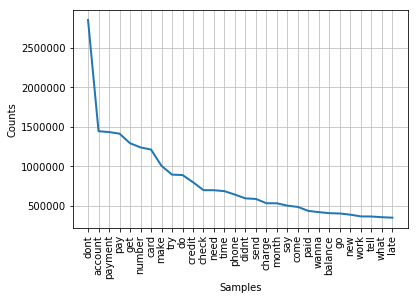

In [17]:
dist = nltk.FreqDist(flattened_list)
dist.plot(30, cumulative=False)

In [3]:
 #Load Saved dict
%time id2word =corpora.Dictionary.load('/data1/call_miner/Vinyas_Call_miner/call_miner/Lavanya/May -Full/R01_id2word.dict')

CPU times: user 1e+03 µs, sys: 1 ms, total: 2 ms
Wall time: 1.68 ms


In [4]:
# load data
import csv
with open('/data1/call_miner/Vinyas_Call_miner/call_miner/Lavanya/May -Full/data_words_trigrams.csv','rU') as f1:
    data_words_trigrams=list( csv.reader(f1) )

In [ ]:
# load trained model from file
from gensim import corpora, models, similarities
lda1=  models.LdaModel.load("/data1/call_miner/Vinyas_Call_miner/call_miner/Lavanya/May -Full/R02_50T_400I_10P.model")

In [7]:
%time coherencemodel = CoherenceModel(model=lda1, texts=data_words_trigrams, dictionary=id2word, coherence='c_v')

CPU times: user 2 ms, sys: 1 ms, total: 3 ms
Wall time: 3.05 ms


In [8]:
coherence_lda = coherencemodel.get_coherence()
print('\nCoherence Score: ', coherence_lda)

OSError: [Errno 12] Cannot allocate memory